In [1]:
#@title Install
!pip install mujoco
!pip install mujoco_mjx
!pip install brax
!command -v ffmpeg >/dev/null || (apt update && apt install -y ffmpeg)
!pip install -q mediapy

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: gpg 1.16.0-unknown has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of gpg or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that the

In [2]:
import torch
torch.cuda.is_available()

ModuleNotFoundError: No module named 'torch'

In [2]:
#@title Check if MuJoCo installation was successful



import distutils.util
import os
import subprocess
if subprocess.run('nvidia-smi').returncode:
  raise RuntimeError(
      'Cannot communicate with GPU. '
      'Make sure you are using a GPU Colab runtime. '
      'Go to the Runtime menu and select Choose runtime type.')

# Add an ICD config so that glvnd can pick up the Nvidia EGL driver.
# This is usually installed as part of an Nvidia driver package, but the Colab
# kernel doesn't install its driver via APT, and as a result the ICD is missing.
# (https://github.com/NVIDIA/libglvnd/blob/master/src/EGL/icd_enumeration.md)
NVIDIA_ICD_CONFIG_PATH = '/usr/share/glvnd/egl_vendor.d/10_nvidia.json'

# Configure MuJoCo to use the EGL rendering backend (requires GPU)
print('Setting environment variable to use GPU rendering:')
%env MUJOCO_GL=egl

try:
  print('Checking that the installation succeeded:')
  import mujoco
  mujoco.MjModel.from_xml_string('<mujoco/>')
except Exception as e:
  raise e from RuntimeError(
      'Something went wrong during installation. Check the shell output above '
      'for more information.\n'
      'If using a hosted Colab runtime, make sure you enable GPU acceleration '
      'by going to the Runtime menu and selecting "Choose runtime type".')

print('Installation successful.')

/tmp/ipykernel_4775/1789122481.py:5: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  import distutils.util


Sat Jan  6 10:24:25 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.23.08              Driver Version: 545.23.08    CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3070 ...    On  | 00000000:01:00.0 Off |                  N/A |
| N/A   35C    P0             752W / 115W |     10MiB /  8192MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [1]:
#@title Import packages for plotting and creating graphics
import time
import itertools
import numpy as np
from typing import Callable, NamedTuple, Optional, Union, List

# Graphics and plotting.
print('Installing mediapy:')
!command -v ffmpeg >/dev/null || (apt update && apt install -y ffmpeg)
!pip install -q mediapy
import mediapy as media
import matplotlib.pyplot as plt

# More legible printing from numpy.
np.set_printoptions(precision=3, suppress=True, linewidth=100)

Installing mediapy:
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: gpg 1.16.0-unknown has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of gpg or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Disc

In [1]:
#@title Import MuJoCo, MJX, and Brax

from datetime import datetime
import functools
import jax
from jax import numpy as jp
import numpy as np
from typing import Any, Dict, Tuple, Union

from brax import envs
from brax import math
from brax.base import Base, Motion, Transform
from brax.envs.base import Env, State
from brax.training.agents.ppo import train as ppo
from brax.training.agents.ppo import networks as ppo_networks
from brax.io import model
from etils import epath
from flax import struct
from matplotlib import pyplot as plt
import mediapy as media
from ml_collections import config_dict
import mujoco
from mujoco import mjx


In [ ]:
from google.colab import drive
drive.mount("Drive")

Drive already mounted at Drive; to attempt to forcibly remount, call drive.mount("Drive", force_remount=True).


In [2]:
%env XLA_PYTHON_CLIENT_PREALLOCATE=false
%env XLA_PYTHON_CLIENT_ALLOCATOR=platform

env: XLA_PYTHON_CLIENT_PREALLOCATE=false
env: XLA_PYTHON_CLIENT_ALLOCATOR=platform


In [3]:
import functools
from datetime import datetime
from brax import envs

In [4]:
#@title Create Environment With Scaling Variables
import sys
import numpy as np
from env_model_generator import humanoid_genesis
from train import tRain
from HumanoidEnv import createIt
from base_env import MjxEnv
from jax import numpy as jp
from brax.envs.base import Env, State
from datetime import datetime
import functools
import jax
from jax import numpy as jp
import numpy as np
from typing import Any, Dict, Tuple, Union

from brax import envs
from brax import math
from brax.base import Base, Motion, Transform
from brax.envs.base import Env, State
from brax.training.agents.ppo import train as ppo
from brax.training.agents.ppo import networks as ppo_networks
from brax.io import model
from etils import epath
from flax import struct
from matplotlib import pyplot as plt
import mediapy as media
from ml_collections import config_dict
import mujoco
import flax
from mujoco import mjx

In [ ]:
#@title Progress Record
def progress_record(iteration, arr_of_x_data, arr_of_y_data, times) :
  ...
  plt.show()

In [18]:
!pwd

/home/name/Desktop/Codes/ScalingOptimization (1)


In [5]:
epsilon = 0.1
init_training_state = None
num_scaling_var = 17 # Must be tuned according to the base model
init_scaling_vars = np.zeros(num_scaling_var)
N = 5
path_to_base_env = "/home/name/Desktop/Codes/ScalingOptimization (1)"
num_iterations_to_go = 500
mutation_limits_wstrt = {
    "max" : [epsilon for i in range(num_scaling_var)],
    "min" : [-epsilon for i in range(num_scaling_var)]
}
mutation_limits_explr = {
    "max" : [2*epsilon for i in range(num_scaling_var)],
    "min" : [-2*epsilon for i in range(num_scaling_var)]
}
num_evals = 5
eelim_factor = 0.21 # Early Elimination Limiting Factor

In [27]:
#@title Humanoid
name = "init"
path = humanoid_genesis([0 for i in range(num_scaling_var)], name)
#path = "/content/Drive/MyDrive/Codes/Data/Xml_files/Humanoid_Gen1_Robot3.xml"
class Humanoid(MjxEnv):

  def __init__(
      self,
      forward_reward_weight=1.25,
      ctrl_cost_weight=0.1,
      healthy_reward=5.0,
      terminate_when_unhealthy=True,
      healthy_z_range=(1.0, 2.0),
      reset_noise_scale=1e-2,
      exclude_current_positions_from_observation=True,
      **kwargs,
  ):
    # path = epath.Path(epath.resource_path('mujoco')) / (
    #     'mjx/benchmark/model/humanoid'
    # )
    # mj_model = mujoco.MjModel.from_xml_path(
    #     (path / 'humanoid.xml').as_posix())
    mj_model = mujoco.MjModel.from_xml_path(path)
    mj_model.opt.solver = mujoco.mjtSolver.mjSOL_CG
    mj_model.opt.iterations = 6
    mj_model.opt.ls_iterations = 6

    physics_steps_per_control_step = 5
    kwargs['physics_steps_per_control_step'] = kwargs.get(
        'physics_steps_per_control_step', physics_steps_per_control_step)

    super().__init__(mj_model=mj_model, **kwargs)

    self._forward_reward_weight = forward_reward_weight
    self._ctrl_cost_weight = ctrl_cost_weight
    self._healthy_reward = healthy_reward
    self._terminate_when_unhealthy = terminate_when_unhealthy
    self._healthy_z_range = healthy_z_range
    self._reset_noise_scale = reset_noise_scale
    self._exclude_current_positions_from_observation = (
        exclude_current_positions_from_observation
    )

  def reset(self, rng: jp.ndarray) -> State:
    """Resets the environment to an initial state."""
    rng, rng1, rng2 = jax.random.split(rng, 3)

    low, hi = -self._reset_noise_scale, self._reset_noise_scale
    qpos = self.sys.qpos0 + jax.random.uniform(
        rng1, (self.sys.nq,), minval=low, maxval=hi
    )
    qvel = jax.random.uniform(
        rng2, (self.sys.nv,), minval=low, maxval=hi
    )

    data = self.pipeline_init(qpos, qvel)

    obs = self._get_obs(data, jp.zeros(self.sys.nu))
    reward, done, zero = jp.zeros(3)
    metrics = {
        'forward_reward': zero,
        'reward_linvel': zero,
        'reward_quadctrl': zero,
        'reward_alive': zero,
        'x_position': zero,
        'y_position': zero,
        'distance_from_origin': zero,
        'x_velocity': zero,
        'y_velocity': zero,
    }
    return State(data, obs, reward, done, metrics)

  def step(self, state: State, action: jp.ndarray) -> State:
    """Runs one timestep of the environment's dynamics."""
    data0 = state.pipeline_state
    data = self.pipeline_step(data0, action)

    com_before = data0.subtree_com[1]
    com_after = data.subtree_com[1]
    velocity = (com_after - com_before) / self.dt
    forward_reward = self._forward_reward_weight * velocity[0]

    min_z, max_z = self._healthy_z_range
    is_healthy = jp.where(data.qpos[2] < min_z, x=0.0, y=1.0)
    is_healthy = jp.where(
        data.qpos[2] > max_z, x=0.0, y=is_healthy
    )
    if self._terminate_when_unhealthy:
      healthy_reward = self._healthy_reward
    else:
      healthy_reward = self._healthy_reward * is_healthy

    ctrl_cost = self._ctrl_cost_weight * jp.sum(jp.square(action))

    obs = self._get_obs(data, action)
    reward = forward_reward + healthy_reward - ctrl_cost
    done = 1.0 - is_healthy if self._terminate_when_unhealthy else 0.0
    state.metrics.update(
        forward_reward=forward_reward,
        reward_linvel=forward_reward,
        reward_quadctrl=-ctrl_cost,
        reward_alive=healthy_reward,
        x_position=com_after[0],
        y_position=com_after[1],
        distance_from_origin=jp.linalg.norm(com_after),
        x_velocity=velocity[0],
        y_velocity=velocity[1],
    )

    return state.replace(
        pipeline_state=data, obs=obs, reward=reward, done=done
    )

  def _get_obs(
      self, data: mjx.Data, action: jp.ndarray
  ) -> jp.ndarray:
    """Observes humanoid body position, velocities, and angles."""
    position = data.qpos
    if self._exclude_current_positions_from_observation:
      position = position[2:]

    # external_contact_forces are excluded
    return jp.concatenate([
        position,
        data.qvel,
        data.cinert[1:].ravel(),
        data.cvel[1:].ravel(),
        data.qfrc_actuator,
    ])


envs.register_environment(name, Humanoid)

In [ ]:
with open('/usr/local/lib/python3.10/dist-packages/mujoco/gl_context.py', 'r') as f: # 'r' is a reading mode
    text = f.read()

appending = """import ctypes
import ctypes.util
ctypes.CDLL(ctypes.util.find_library('GL'), ctypes.RTLD_GLOBAL)

"""

with open('/usr/local/lib/python3.10/dist-packages/mujoco/gl_context.py', 'w') as f: # 'w' is a writing mode
    f.write(appending + text)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
init_env = envs.get_environment (createIt(humanoid_genesis([0 for i in range(num_scaling_var)], "init"), "init"))


jit_reset = jax.jit(init_env.reset)
jit_step = jax.jit(init_env.step)

# instantiate the renderer
%env MUJOCO_GL=glx
renderer = None
renderer = mujoco.Renderer(init_env.model, width = 1920, height = 1080 )

env: MUJOCO_GL=glx


In [ ]:
#@title Define a render utility function
def get_image(state: State, camera: str) -> np.ndarray:
  """Renders the environment state."""
  d = mujoco.MjData(init_env.model)
  # write the mjx.Data into an mjData object
  mjx.device_get_into(d, state.pipeline_state)
  mujoco.mj_forward(init_env.model, d)
  # use the mjData object to update the renderer
  renderer.update_scene(d, camera=camera)
  return renderer.render()


# initialize the state
state = jit_reset(jax.random.PRNGKey(0))
rollout = [state]
images = [get_image(state, camera='side')]

# grab a trajectory
for i in range(50):
  ctrl = -0.1 * jp.ones(init_env.sys.nu)
  state = jit_step(state, ctrl)
  rollout.append(state)
  images.append(get_image(state, camera='side'))

media.show_video(images = images, fps=1.0 / init_env.dt )


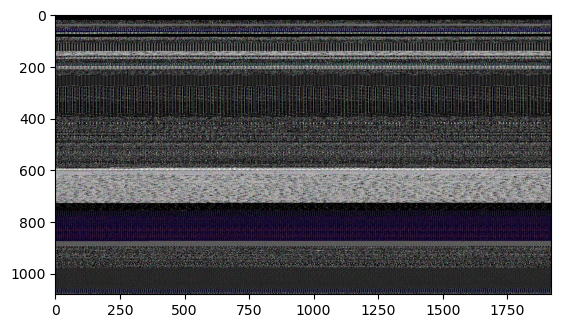

In [26]:
plt.imshow(images[13])

In [7]:
init_env = envs.get_environment (createIt(humanoid_genesis([0 for i in range(num_scaling_var)], "init"), "init"))

In [8]:
num_evals = 5
train_fn = functools.partial(
    tRain, num_timesteps=10_000_000, num_evals=num_evals, reward_scaling=0.1,
    episode_length=1000, normalize_observations=True, action_repeat=1,
    unroll_length=10, num_minibatches=32, num_updates_per_batch=8,
    discounting=0.97, learning_rate=3e-4, entropy_cost=1e-3, num_envs=2048,
    batch_size=1024, seed=0)


x_data = []
y_data = []
ydataerr = []
times = [datetime.now()]
max_y, min_y = 5000, 0

rew_lower_limit = lambda r,t: r*jp.exp(eelim_factor*(t-num_evals+1))

def progress(num_steps, metrics, cmprsn_rewards = None):
  #Array data update
  times.append(datetime.now())
  x_data.append(num_steps)
  y_data.append(metrics['eval/episode_reward'])
  ydataerr.append(metrics['eval/episode_reward_std'])
  #Plot drawing
  plt.xlim([0, train_fn.keywords['num_timesteps'] * 1.25])
  plt.ylim([min_y, max_y])

  plt.xlabel('# environment steps')
  plt.ylabel('reward per episode')
  plt.title(f'y={y_data[-1]:.3f}')

  plt.errorbar(
      x_data, y_data, yerr=ydataerr)
  plt.show()
  #Early elimination calculation
  if cmprsn_rewards == None : 
    return False
  else : 
    t = len(y_data) - 1
    r_t = cmprsn_rewards[t]
    if y_data[-1] < rew_lower_limit(r_t,t): 
      return True
    else : 
      return False


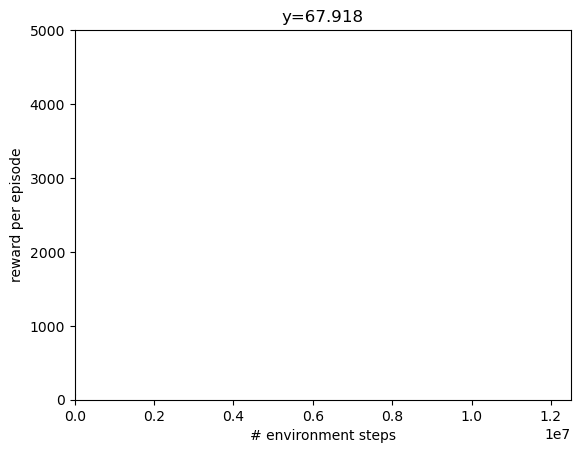

{'eval/walltime': 50.37354373931885, 'training/sps': 34402.233404291714, 'training/walltime': 76.19970393180847, 'training/entropy_loss': Array(-0.013, dtype=float32), 'training/policy_loss': Array(0.002, dtype=float32), 'training/total_loss': Array(0.114, dtype=float32), 'training/v_loss': Array(0.125, dtype=float32), 'eval/episode_distance_from_origin': Array(36.428, dtype=float32), 'eval/episode_forward_reward': Array(7.374, dtype=float32), 'eval/episode_reward': Array(197.213, dtype=float32), 'eval/episode_reward_alive': Array(214.102, dtype=float32), 'eval/episode_reward_linvel': Array(7.374, dtype=float32), 'eval/episode_reward_quadctrl': Array(-24.262, dtype=float32), 'eval/episode_x_position': Array(2.604, dtype=float32), 'eval/episode_x_velocity': Array(5.899, dtype=float32), 'eval/episode_y_position': Array(1.204, dtype=float32), 'eval/episode_y_velocity': Array(2.478, dtype=float32), 'eval/episode_distance_from_origin_std': Array(7.874, dtype=float32), 'eval/episode_forward_

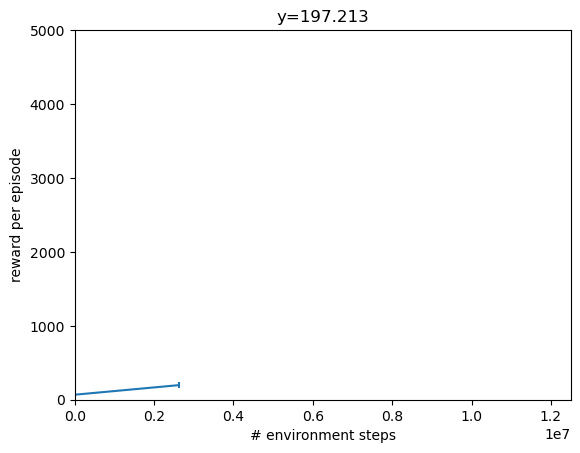

{'eval/walltime': 60.64380121231079, 'training/sps': 49616.367227017174, 'training/walltime': 129.03388237953186, 'training/entropy_loss': Array(-0.011, dtype=float32), 'training/policy_loss': Array(-0.014, dtype=float32), 'training/total_loss': Array(0.03, dtype=float32), 'training/v_loss': Array(0.056, dtype=float32), 'eval/episode_distance_from_origin': Array(46.317, dtype=float32), 'eval/episode_forward_reward': Array(12.767, dtype=float32), 'eval/episode_reward': Array(251.873, dtype=float32), 'eval/episode_reward_alive': Array(267.5, dtype=float32), 'eval/episode_reward_linvel': Array(12.767, dtype=float32), 'eval/episode_reward_quadctrl': Array(-28.393, dtype=float32), 'eval/episode_x_position': Array(5.488, dtype=float32), 'eval/episode_x_velocity': Array(10.213, dtype=float32), 'eval/episode_y_position': Array(1.173, dtype=float32), 'eval/episode_y_velocity': Array(1.791, dtype=float32), 'eval/episode_distance_from_origin_std': Array(8.253, dtype=float32), 'eval/episode_forwar

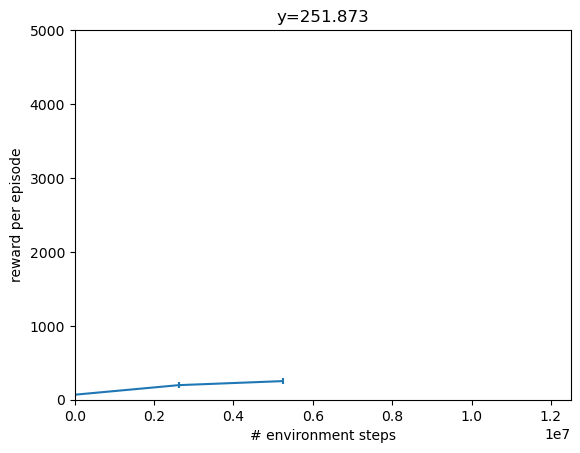

{'eval/walltime': 71.01440644264221, 'training/sps': 49330.089562844194, 'training/walltime': 182.17467379570007, 'training/entropy_loss': Array(-0.01, dtype=float32), 'training/policy_loss': Array(-0.011, dtype=float32), 'training/total_loss': Array(0.023, dtype=float32), 'training/v_loss': Array(0.044, dtype=float32), 'eval/episode_distance_from_origin': Array(52.192, dtype=float32), 'eval/episode_forward_reward': Array(19.69, dtype=float32), 'eval/episode_reward': Array(289.146, dtype=float32), 'eval/episode_reward_alive': Array(298.75, dtype=float32), 'eval/episode_reward_linvel': Array(19.69, dtype=float32), 'eval/episode_reward_quadctrl': Array(-29.294, dtype=float32), 'eval/episode_x_position': Array(8.478, dtype=float32), 'eval/episode_x_velocity': Array(15.752, dtype=float32), 'eval/episode_y_position': Array(1.716, dtype=float32), 'eval/episode_y_velocity': Array(3.19, dtype=float32), 'eval/episode_distance_from_origin_std': Array(9.466, dtype=float32), 'eval/episode_forward_

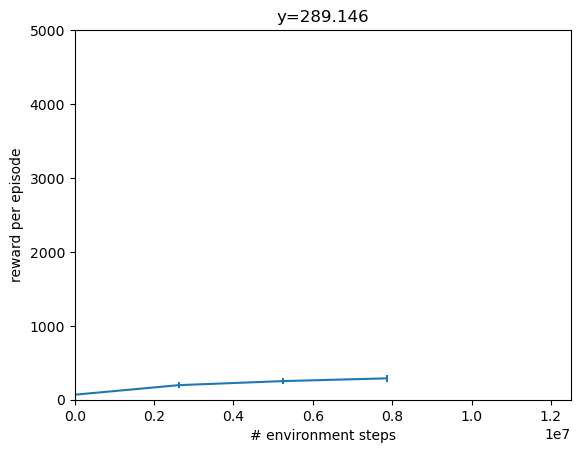

{'eval/walltime': 81.42268109321594, 'training/sps': 49113.31099483755, 'training/walltime': 235.5500204563141, 'training/entropy_loss': Array(-0.009, dtype=float32), 'training/policy_loss': Array(-0.011, dtype=float32), 'training/total_loss': Array(0.019, dtype=float32), 'training/v_loss': Array(0.039, dtype=float32), 'eval/episode_distance_from_origin': Array(64.447, dtype=float32), 'eval/episode_forward_reward': Array(24.854, dtype=float32), 'eval/episode_reward': Array(353.827, dtype=float32), 'eval/episode_reward_alive': Array(363.281, dtype=float32), 'eval/episode_reward_linvel': Array(24.854, dtype=float32), 'eval/episode_reward_quadctrl': Array(-34.308, dtype=float32), 'eval/episode_x_position': Array(13.422, dtype=float32), 'eval/episode_x_velocity': Array(19.883, dtype=float32), 'eval/episode_y_position': Array(3.636, dtype=float32), 'eval/episode_y_velocity': Array(5.663, dtype=float32), 'eval/episode_distance_from_origin_std': Array(13.932, dtype=float32), 'eval/episode_for

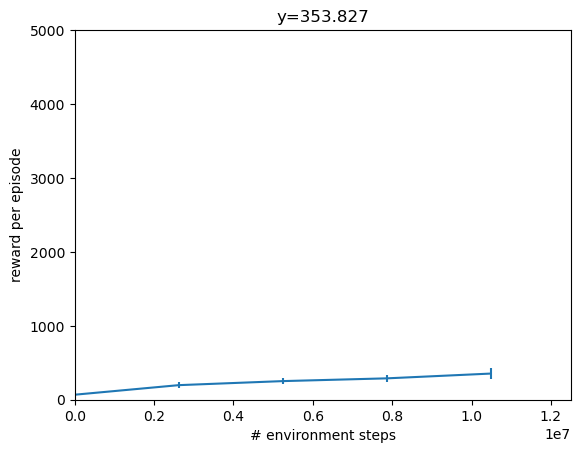

time to jit: 0:00:59.292811
time to train: 0:04:37.430343


In [9]:
      
make_inference_fn, params, _,ancestor_training_state = train_fn(environment=init_env, progress_fn=progress)
print(f'time to jit: {times[1] - times[0]}')
print(f'time to train: {times[-1] - times[1]}')

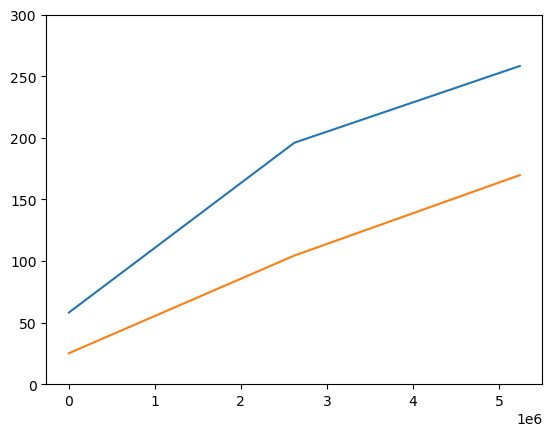

In [18]:
plt.ylim([min_y, 300])
plt.plot(x_data, y_data)
plt.plot(x_data, [rew_lower_limit(y_data[i], i) for i in range(len(y_data))])
plt.show()

In [19]:
print(y_data)

[Array(58.093, dtype=float32), Array(195.912, dtype=float32), Array(258.202, dtype=float32)]


In [7]:
@flax.struct.dataclass
class Robot :
  scaling_var: np.ndarray
  model_path: str
  brain : any

In [8]:
x_data = []
y_data = []
ydataerr = []
times = [datetime.now()]

In [60]:
#@title Genetic Algorithm (Early Elimination)
#name = "init"
#path = humanoid_genesis([0 for i in range(num_scaling_var)], name)
path = "/home/name/Desktop/Codes/Data/Xml_files/init.xml"
init_robot = Robot(np.array([ 0 for i in range(num_scaling_var)]),
                   path,
                   ancestor_training_state
                   )
continue_from = 0
Candidates = [init_robot for i in range(N)]
FitnessScores = [0 for i in range(N)]
FitnessScores = np.array(FitnessScores)
Params = [0 for i in range(N)]
selected = init_robot
Envs = [0 for i in range(N)]
for i in range(continue_from, num_iterations_to_go):
  cmprsn_rewards = None
  print(i)
  #Sampling
  for j in range(2): # ADJUST THE HEALTHY Z RANGE, OBTAINED FROM GENESIS
      sc_var_change = np.random.uniform(mutation_limits_wstrt["min"], mutation_limits_wstrt["max"])
      new_scv = np.add(selected.scaling_var,sc_var_change)
      name=f"Humanoid_Gen{i}_Robot{j}"
      Candidates[j] = Robot(new_scv, humanoid_genesis(new_scv, name), selected.brain)
  for j in range(2):
      sc_var_change = np.random.uniform(mutation_limits_wstrt["min"], mutation_limits_wstrt["max"])
      new_scv = np.add(selected.scaling_var,sc_var_change)
      name=f"Humanoid_Gen{i}_Robot{j+2}"
      Candidates[j+2] = Robot(new_scv, humanoid_genesis(new_scv, name), selected.brain)

  #Fitness scores(perhaps can be taken from y_datas)
  for k in range(N-1):
    name=f"Humanoid_Gen{i}_Robot{k}"
    rob_env = envs.get_environment (createIt(Candidates[k].model_path, name))
    Envs[k] = rob_env
    
    x_data = []
    y_data = []
    ydataerr = []
    times = [datetime.now()]
    print(f"\n--------\n\nIteration{i}-Robot{k}\n\n--------\n")
    make_inference_fn, Params[k], _,rob_new_training_state = train_fn(environment=rob_env, progress_fn=progress, transfer_params=Candidates[k].brain, cmprsn_rewards=cmprsn_rewards)
    #make_inference_fn, Params[k], _,rob_new_training_state = train_fn(environment=rob_env, progress_fn=progress)
    print(f'time to jit: {times[1] - times[0]}')
    print(f'time to train: {times[-1] - times[1]}')
    FitnessScores[k] = y_data[-1]
    new_rob = Robot(Candidates[k].scaling_var, Candidates[k].model_path, rob_new_training_state)
    Candidates[k] = new_rob
    if cmprsn_rewards == None: 
      cmprsn_rewards = y_data
    elif cmprsn_rewards[-1]<y_data[-1] :
      cmprsn_rewards = y_data
    
        
  #Selection and Recording
  index = np.argmax(FitnessScores)
  selected = Candidates[index]
  selected_params = Params[index]
  name = f"policy-Gen{i}"
  model_path = f'/home/name/Desktop/Codes/ScalingOptimization (1)/policies/{name}'
  model.save_params(model_path, selected_params)
  f = open("/home/name/Desktop/Codes/ScalingOptimization (1)/logofselecteds.txt", "a")
  f.write(f"{i}. Generation Model:{model_path}\n{i}. Generation Scaling Variables: {selected.scaling_var}\n")
  f.close()

  inference_fn = make_inference_fn(selected_params)
  jit_inference_fn = jax.jit(inference_fn)
  eval_env = Envs[index]
  jit_reset = jax.jit(eval_env.reset)
  jit_step = jax.jit(eval_env.step)
  # initialize the staterenderer = None
  renderer = None
  renderer = mujoco.Renderer(eval_env.model, width = 1920, height = 1080 )
  def get_image(state: State, camera: str) -> np.ndarray:
    """Renders the environment state."""
    d = mujoco.MjData(eval_env.model)
    # write the mjx.Data into an mjData object
    mjx.device_get_into(d, state.pipeline_state)
    mujoco.mj_forward(eval_env.model, d)
    # use the mjData object to update the renderer
    renderer.update_scene(d, camera=camera)
    return renderer.render()
  rng = jax.random.PRNGKey(0)
  state = jit_reset(rng)
  rollout = [state]
  images = [get_image(state, camera='side')]

  n_steps = 5000
  render_every = 2

  for k in range(n_steps):
    act_rng, rng = jax.random.split(rng)
    ctrl, _ = jit_inference_fn(state.obs, act_rng)
    state = jit_step(state, ctrl)
    rollout.append(state)
    if k % render_every == 0:
      images.append(get_image(state, camera='side'))

    if state.done:
      break

  media.write_video(path = f"/home/name/Desktop/Videos/Running_Genetic/Gen{i}Runner_Selected.mp4", images = images, fps=1.0 / eval_env.dt / render_every)
  Candidates[4] = selected
  FitnessScores[4] = FitnessScores[index]
  Params[4] = selected_params
  Envs[4] = eval_env

NameError: name 'ancestor_training_state' is not defined

In [ ]:
#4M ts Explorer catches 5M ts Original
#3M ts WarmStarting catches 5M ts Original
#7M ts Explorer catches 10M ts Original
#6M ts Warmstarting catches 10M ts Original

In [ ]:
#@title Load Model and Define Inference Function
model_path = '/content/Drive/MyDrive/Codes/ScalingOptimization/policies/policy-Gen1'
params = model.load_params(model_path)

inference_fn = make_inference_fn(params)
jit_inference_fn = jax.jit(inference_fn)

In [ ]:
eval_env = envs.get_environment("init")

jit_reset = jax.jit(eval_env.reset)
jit_step = jax.jit(eval_env.step)

/usr/local/lib/python3.10/dist-packages/mujoco/mjx/_src/device.py:187: DeprecationWarning: device_put is deprecated, use put_model and put_data instead
  warnings.warn(


In [1]:
# initialize the state
rng = jax.random.PRNGKey(0)
state = jit_reset(rng)
rollout = [state]
images = [get_image(state, camera='side')]

# grab a trajectory
n_steps = 5000
render_every = 2

for i in range(n_steps):
  act_rng, rng = jax.random.split(rng)
  ctrl, _ = jit_inference_fn(state.obs, act_rng)
  state = jit_step(state, ctrl)
  rollout.append(state)
  if i % render_every == 0train_fn = functools.partial(
    tRain, num_timesteps=10_000_000, num_evals=num_evals, reward_scaling=0.1,
    episode_length=1000, normalize_observations=True, action_repeat=1,
    unroll_length=10, num_minibatches=32, num_updates_per_batch=8,
    discounting=0.97, learning_rate=3e-4, entropy_cost=1e-3, num_envs=2048,
    batch_size=1024, seed=0):
    images.append(get_image(state, camera='side'))

  if state.done:
    breaks

media.show_video(images, fps=1.0 / eval_env.dt / render_every)

NameError: name 'jax' is not defined

In [10]:
train_fn = functools.partial(
    tRain, num_timesteps=10_000_000, num_evals=num_evals, reward_scaling=0.1,
    episode_length=1000, normalize_observations=True, action_repeat=1,
    unroll_length=10, num_minibatches=32, num_updates_per_batch=8,
    discounting=0.97, learning_rate=3e-4, entropy_cost=1e-3, num_envs=2048,
    batch_size=1024, seed=0)

0

--------

Iteration0-Robot0

--------



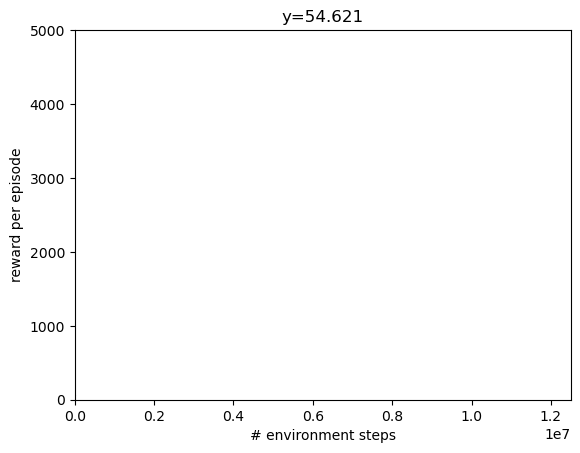

{'eval/walltime': 56.67906379699707, 'training/sps': 32527.823783622247, 'training/walltime': 80.59069728851318, 'training/entropy_loss': Array(-0.013, dtype=float32), 'training/policy_loss': Array(0.001, dtype=float32), 'training/total_loss': Array(0.139, dtype=float32), 'training/v_loss': Array(0.151, dtype=float32), 'eval/episode_distance_from_origin': Array(34.627, dtype=float32), 'eval/episode_forward_reward': Array(6.65, dtype=float32), 'eval/episode_reward': Array(186.449, dtype=float32), 'eval/episode_reward_alive': Array(202.578, dtype=float32), 'eval/episode_reward_linvel': Array(6.65, dtype=float32), 'eval/episode_reward_quadctrl': Array(-22.78, dtype=float32), 'eval/episode_x_position': Array(2.886, dtype=float32), 'eval/episode_x_velocity': Array(5.32, dtype=float32), 'eval/episode_y_position': Array(0.711, dtype=float32), 'eval/episode_y_velocity': Array(1.005, dtype=float32), 'eval/episode_distance_from_origin_std': Array(8.198, dtype=float32), 'eval/episode_forward_rewa

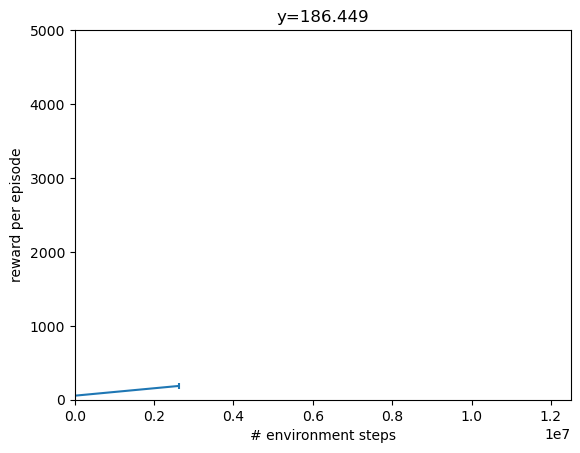

{'eval/walltime': 66.95436882972717, 'training/sps': 49630.40467251574, 'training/walltime': 133.40993213653564, 'training/entropy_loss': Array(-0.011, dtype=float32), 'training/policy_loss': Array(-0.014, dtype=float32), 'training/total_loss': Array(0.056, dtype=float32), 'training/v_loss': Array(0.082, dtype=float32), 'eval/episode_distance_from_origin': Array(45.868, dtype=float32), 'eval/episode_forward_reward': Array(16.05, dtype=float32), 'eval/episode_reward': Array(250.968, dtype=float32), 'eval/episode_reward_alive': Array(263.125, dtype=float32), 'eval/episode_reward_linvel': Array(16.05, dtype=float32), 'eval/episode_reward_quadctrl': Array(-28.207, dtype=float32), 'eval/episode_x_position': Array(7.01, dtype=float32), 'eval/episode_x_velocity': Array(12.84, dtype=float32), 'eval/episode_y_position': Array(1.642, dtype=float32), 'eval/episode_y_velocity': Array(2.162, dtype=float32), 'eval/episode_distance_from_origin_std': Array(9.48, dtype=float32), 'eval/episode_forward_r

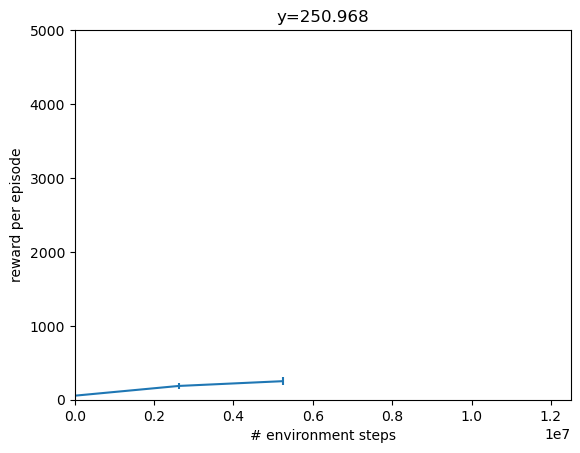

{'eval/walltime': 77.27264738082886, 'training/sps': 49531.14716360869, 'training/walltime': 186.33501362800598, 'training/entropy_loss': Array(-0.01, dtype=float32), 'training/policy_loss': Array(-0.012, dtype=float32), 'training/total_loss': Array(0.052, dtype=float32), 'training/v_loss': Array(0.074, dtype=float32), 'eval/episode_distance_from_origin': Array(55.749, dtype=float32), 'eval/episode_forward_reward': Array(25.964, dtype=float32), 'eval/episode_reward': Array(303.666, dtype=float32), 'eval/episode_reward_alive': Array(309.609, dtype=float32), 'eval/episode_reward_linvel': Array(25.964, dtype=float32), 'eval/episode_reward_quadctrl': Array(-31.908, dtype=float32), 'eval/episode_x_position': Array(14.226, dtype=float32), 'eval/episode_x_velocity': Array(20.771, dtype=float32), 'eval/episode_y_position': Array(2.38, dtype=float32), 'eval/episode_y_velocity': Array(2.523, dtype=float32), 'eval/episode_distance_from_origin_std': Array(14.227, dtype=float32), 'eval/episode_forw

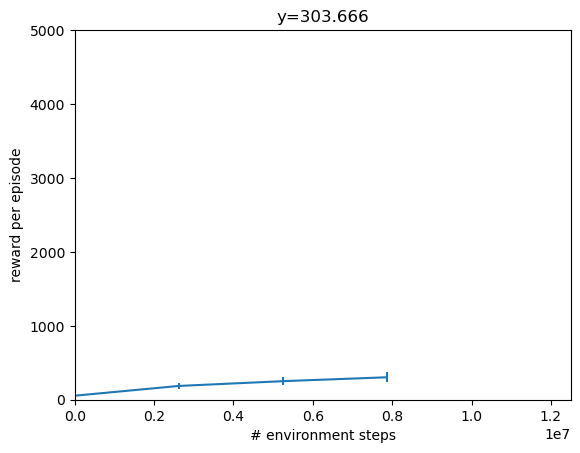

{'eval/walltime': 87.6075987815857, 'training/sps': 49358.71198925564, 'training/walltime': 239.44498944282532, 'training/entropy_loss': Array(-0.009, dtype=float32), 'training/policy_loss': Array(-0.012, dtype=float32), 'training/total_loss': Array(0.048, dtype=float32), 'training/v_loss': Array(0.069, dtype=float32), 'eval/episode_distance_from_origin': Array(76.756, dtype=float32), 'eval/episode_forward_reward': Array(40.895, dtype=float32), 'eval/episode_reward': Array(397.236, dtype=float32), 'eval/episode_reward_alive': Array(395.508, dtype=float32), 'eval/episode_reward_linvel': Array(40.895, dtype=float32), 'eval/episode_reward_quadctrl': Array(-39.168, dtype=float32), 'eval/episode_x_position': Array(29.705, dtype=float32), 'eval/episode_x_velocity': Array(32.716, dtype=float32), 'eval/episode_y_position': Array(4.401, dtype=float32), 'eval/episode_y_velocity': Array(3.883, dtype=float32), 'eval/episode_distance_from_origin_std': Array(23.132, dtype=float32), 'eval/episode_for

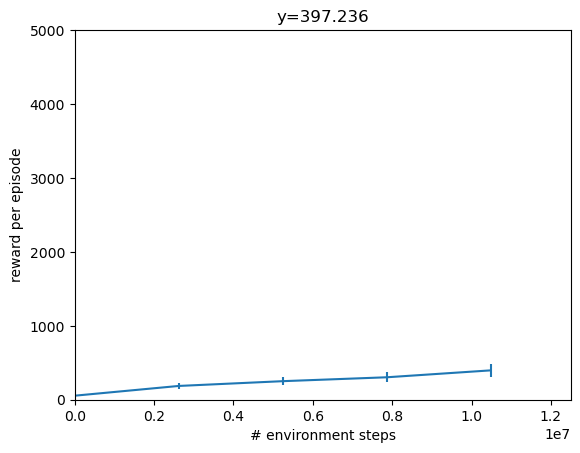

time to jit: 0:01:06.533232
time to train: 0:04:41.247583

--------

Iteration0-Robot1

--------



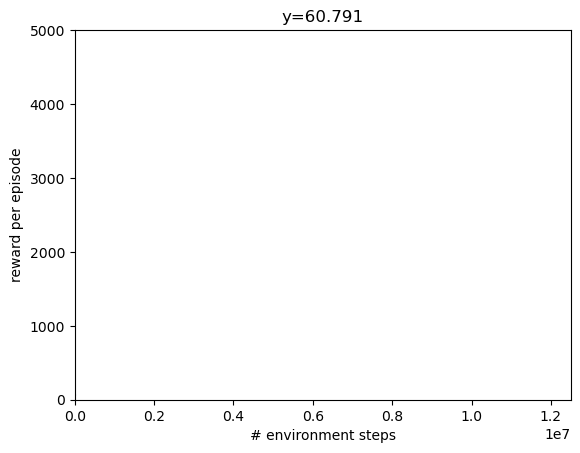

{'eval/walltime': 59.529985427856445, 'training/sps': 32799.646060390856, 'training/walltime': 79.92281365394592, 'training/entropy_loss': Array(-0.013, dtype=float32), 'training/policy_loss': Array(0.001, dtype=float32), 'training/total_loss': Array(0.129, dtype=float32), 'training/v_loss': Array(0.141, dtype=float32), 'eval/episode_distance_from_origin': Array(35.997, dtype=float32), 'eval/episode_forward_reward': Array(7.325, dtype=float32), 'eval/episode_reward': Array(192.322, dtype=float32), 'eval/episode_reward_alive': Array(208.125, dtype=float32), 'eval/episode_reward_linvel': Array(7.325, dtype=float32), 'eval/episode_reward_quadctrl': Array(-23.129, dtype=float32), 'eval/episode_x_position': Array(3.067, dtype=float32), 'eval/episode_x_velocity': Array(5.86, dtype=float32), 'eval/episode_y_position': Array(0.78, dtype=float32), 'eval/episode_y_velocity': Array(0.898, dtype=float32), 'eval/episode_distance_from_origin_std': Array(8.112, dtype=float32), 'eval/episode_forward_r

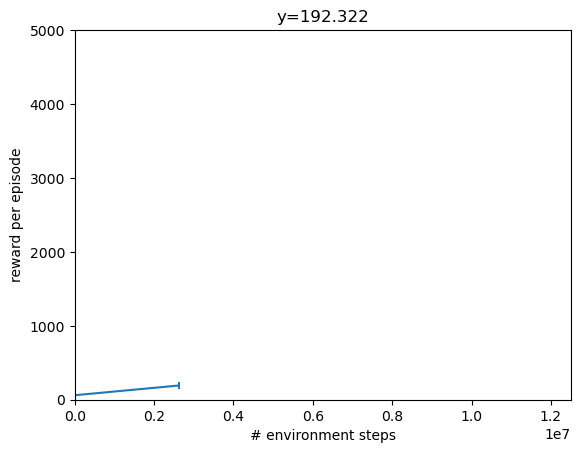

{'eval/walltime': 69.88141083717346, 'training/sps': 49468.685738674714, 'training/walltime': 132.9147207736969, 'training/entropy_loss': Array(-0.012, dtype=float32), 'training/policy_loss': Array(-0.014, dtype=float32), 'training/total_loss': Array(0.049, dtype=float32), 'training/v_loss': Array(0.075, dtype=float32), 'eval/episode_distance_from_origin': Array(47.383, dtype=float32), 'eval/episode_forward_reward': Array(18.215, dtype=float32), 'eval/episode_reward': Array(255.218, dtype=float32), 'eval/episode_reward_alive': Array(265.195, dtype=float32), 'eval/episode_reward_linvel': Array(18.215, dtype=float32), 'eval/episode_reward_quadctrl': Array(-28.191, dtype=float32), 'eval/episode_x_position': Array(8.379, dtype=float32), 'eval/episode_x_velocity': Array(14.572, dtype=float32), 'eval/episode_y_position': Array(0.88, dtype=float32), 'eval/episode_y_velocity': Array(0.93, dtype=float32), 'eval/episode_distance_from_origin_std': Array(11.058, dtype=float32), 'eval/episode_forwa

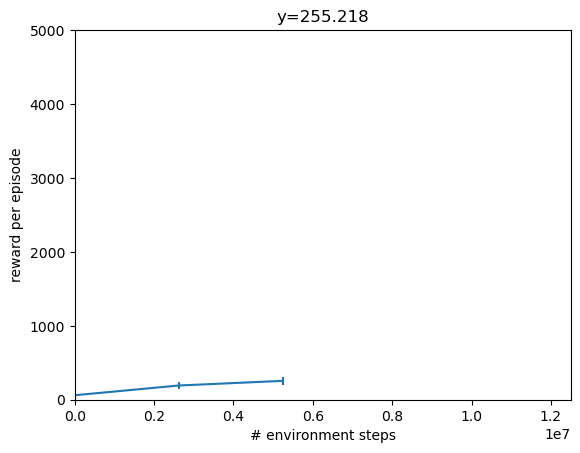

{'eval/walltime': 80.22650098800659, 'training/sps': 49241.23409615088, 'training/walltime': 186.15140438079834, 'training/entropy_loss': Array(-0.011, dtype=float32), 'training/policy_loss': Array(-0.013, dtype=float32), 'training/total_loss': Array(0.046, dtype=float32), 'training/v_loss': Array(0.069, dtype=float32), 'eval/episode_distance_from_origin': Array(58.892, dtype=float32), 'eval/episode_forward_reward': Array(31.001, dtype=float32), 'eval/episode_reward': Array(313.901, dtype=float32), 'eval/episode_reward_alive': Array(314.766, dtype=float32), 'eval/episode_reward_linvel': Array(31.001, dtype=float32), 'eval/episode_reward_quadctrl': Array(-31.866, dtype=float32), 'eval/episode_x_position': Array(16.987, dtype=float32), 'eval/episode_x_velocity': Array(24.801, dtype=float32), 'eval/episode_y_position': Array(3.115, dtype=float32), 'eval/episode_y_velocity': Array(3.293, dtype=float32), 'eval/episode_distance_from_origin_std': Array(14.95, dtype=float32), 'eval/episode_for

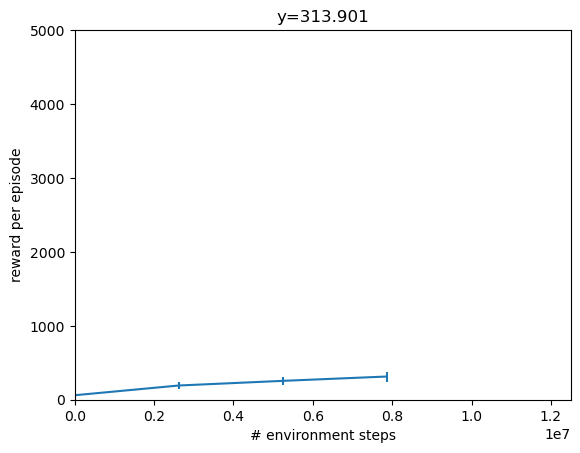

{'eval/walltime': 90.49419641494751, 'training/sps': 49227.90982699217, 'training/walltime': 239.40249729156494, 'training/entropy_loss': Array(-0.009, dtype=float32), 'training/policy_loss': Array(-0.012, dtype=float32), 'training/total_loss': Array(0.044, dtype=float32), 'training/v_loss': Array(0.066, dtype=float32), 'eval/episode_distance_from_origin': Array(87.144, dtype=float32), 'eval/episode_forward_reward': Array(45.954, dtype=float32), 'eval/episode_reward': Array(425.71, dtype=float32), 'eval/episode_reward_alive': Array(421.25, dtype=float32), 'eval/episode_reward_linvel': Array(45.954, dtype=float32), 'eval/episode_reward_quadctrl': Array(-41.494, dtype=float32), 'eval/episode_x_position': Array(37.839, dtype=float32), 'eval/episode_x_velocity': Array(36.763, dtype=float32), 'eval/episode_y_position': Array(3.937, dtype=float32), 'eval/episode_y_velocity': Array(-0.02, dtype=float32), 'eval/episode_distance_from_origin_std': Array(32.072, dtype=float32), 'eval/episode_forw

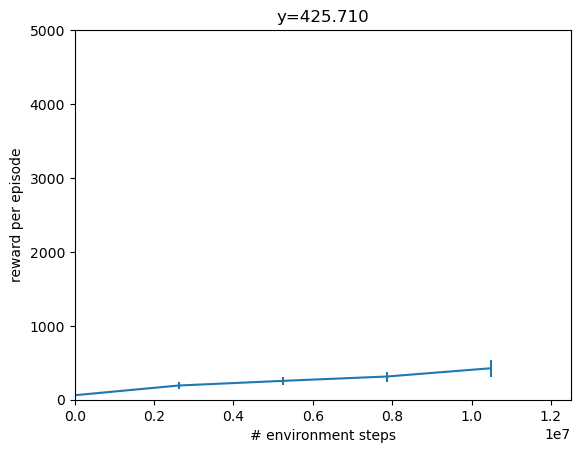

time to jit: 0:01:06.606993
time to train: 0:04:41.525370

--------

Iteration0-Robot2

--------



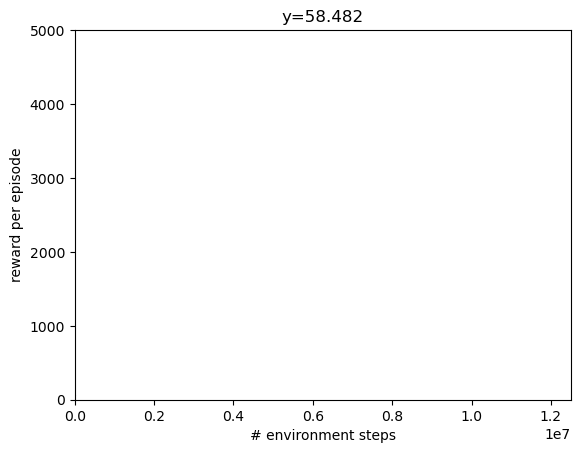

{'eval/walltime': 60.181599617004395, 'training/sps': 32479.73334890611, 'training/walltime': 80.71002221107483, 'training/entropy_loss': Array(-0.013, dtype=float32), 'training/policy_loss': Array(0.001, dtype=float32), 'training/total_loss': Array(0.133, dtype=float32), 'training/v_loss': Array(0.145, dtype=float32), 'eval/episode_distance_from_origin': Array(36.148, dtype=float32), 'eval/episode_forward_reward': Array(6.592, dtype=float32), 'eval/episode_reward': Array(196.262, dtype=float32), 'eval/episode_reward_alive': Array(212.891, dtype=float32), 'eval/episode_reward_linvel': Array(6.592, dtype=float32), 'eval/episode_reward_quadctrl': Array(-23.22, dtype=float32), 'eval/episode_x_position': Array(2.493, dtype=float32), 'eval/episode_x_velocity': Array(5.274, dtype=float32), 'eval/episode_y_position': Array(0.475, dtype=float32), 'eval/episode_y_velocity': Array(0.811, dtype=float32), 'eval/episode_distance_from_origin_std': Array(8.461, dtype=float32), 'eval/episode_forward_r

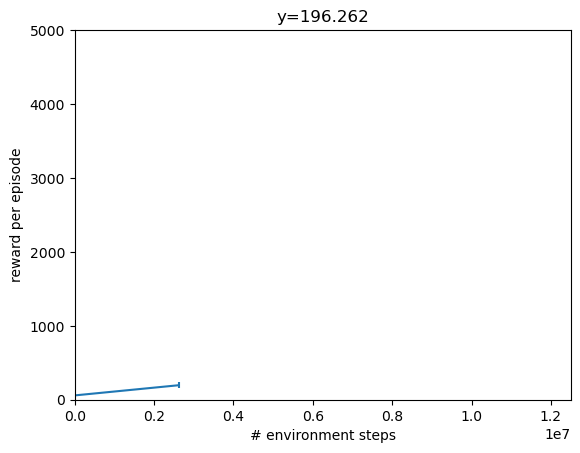

{'eval/walltime': 70.48836159706116, 'training/sps': 49385.74253299512, 'training/walltime': 133.7909290790558, 'training/entropy_loss': Array(-0.012, dtype=float32), 'training/policy_loss': Array(-0.015, dtype=float32), 'training/total_loss': Array(0.053, dtype=float32), 'training/v_loss': Array(0.08, dtype=float32), 'eval/episode_distance_from_origin': Array(46.879, dtype=float32), 'eval/episode_forward_reward': Array(13.034, dtype=float32), 'eval/episode_reward': Array(256.851, dtype=float32), 'eval/episode_reward_alive': Array(272.148, dtype=float32), 'eval/episode_reward_linvel': Array(13.034, dtype=float32), 'eval/episode_reward_quadctrl': Array(-28.331, dtype=float32), 'eval/episode_x_position': Array(6.187, dtype=float32), 'eval/episode_x_velocity': Array(10.427, dtype=float32), 'eval/episode_y_position': Array(1.377, dtype=float32), 'eval/episode_y_velocity': Array(1.838, dtype=float32), 'eval/episode_distance_from_origin_std': Array(11.464, dtype=float32), 'eval/episode_forwa

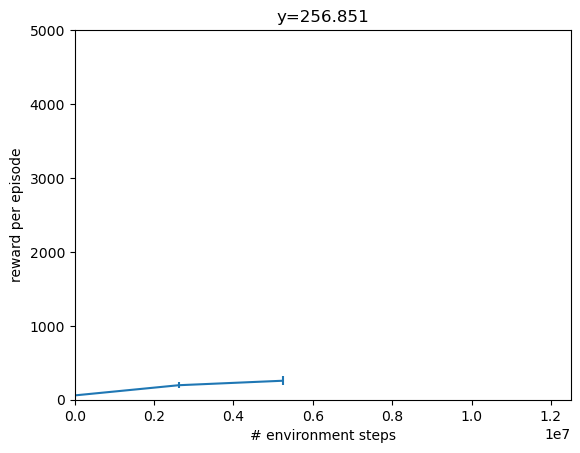

{'eval/walltime': 80.7684679031372, 'training/sps': 49261.45793493448, 'training/walltime': 187.005756855011, 'training/entropy_loss': Array(-0.011, dtype=float32), 'training/policy_loss': Array(-0.013, dtype=float32), 'training/total_loss': Array(0.043, dtype=float32), 'training/v_loss': Array(0.067, dtype=float32), 'eval/episode_distance_from_origin': Array(60.217, dtype=float32), 'eval/episode_forward_reward': Array(26.363, dtype=float32), 'eval/episode_reward': Array(329.263, dtype=float32), 'eval/episode_reward_alive': Array(335.781, dtype=float32), 'eval/episode_reward_linvel': Array(26.363, dtype=float32), 'eval/episode_reward_quadctrl': Array(-32.881, dtype=float32), 'eval/episode_x_position': Array(15.619, dtype=float32), 'eval/episode_x_velocity': Array(21.091, dtype=float32), 'eval/episode_y_position': Array(3.022, dtype=float32), 'eval/episode_y_velocity': Array(3.759, dtype=float32), 'eval/episode_distance_from_origin_std': Array(14.097, dtype=float32), 'eval/episode_forwa

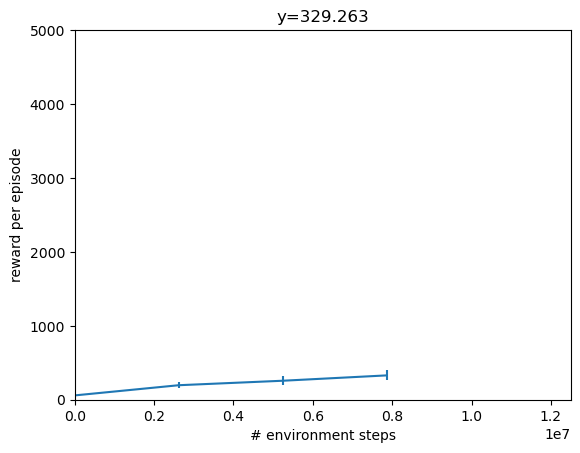

{'eval/walltime': 91.07869696617126, 'training/sps': 49202.604389862296, 'training/walltime': 240.28423738479614, 'training/entropy_loss': Array(-0.009, dtype=float32), 'training/policy_loss': Array(-0.013, dtype=float32), 'training/total_loss': Array(0.047, dtype=float32), 'training/v_loss': Array(0.069, dtype=float32), 'eval/episode_distance_from_origin': Array(83.888, dtype=float32), 'eval/episode_forward_reward': Array(41.438, dtype=float32), 'eval/episode_reward': Array(427.231, dtype=float32), 'eval/episode_reward_alive': Array(426.992, dtype=float32), 'eval/episode_reward_linvel': Array(41.438, dtype=float32), 'eval/episode_reward_quadctrl': Array(-41.2, dtype=float32), 'eval/episode_x_position': Array(34.308, dtype=float32), 'eval/episode_x_velocity': Array(33.151, dtype=float32), 'eval/episode_y_position': Array(6.019, dtype=float32), 'eval/episode_y_velocity': Array(5.301, dtype=float32), 'eval/episode_distance_from_origin_std': Array(25.828, dtype=float32), 'eval/episode_for

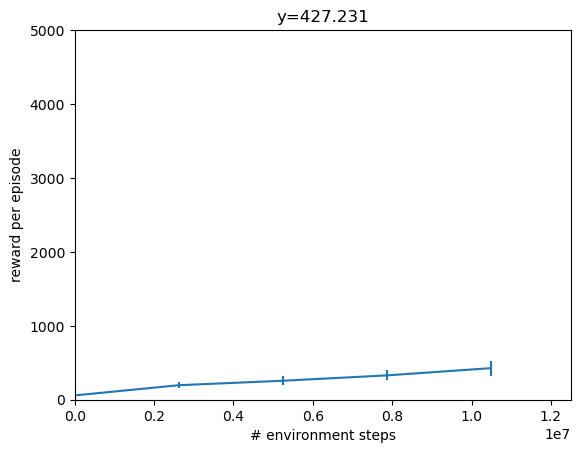

time to jit: 0:01:07.611472
time to train: 0:04:41.765733

--------

Iteration0-Robot3

--------



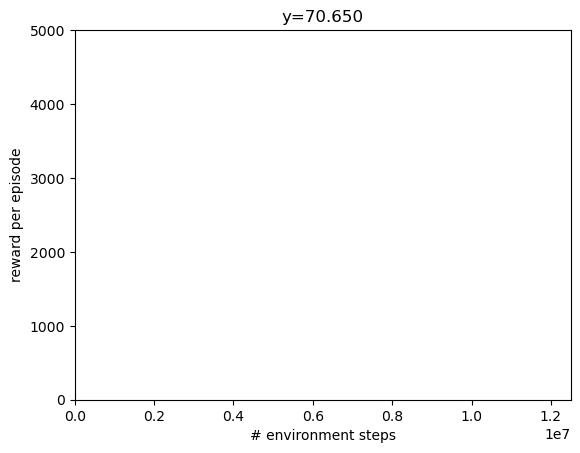

{'eval/walltime': 60.37964367866516, 'training/sps': 32348.842241178114, 'training/walltime': 81.03659415245056, 'training/entropy_loss': Array(-0.013, dtype=float32), 'training/policy_loss': Array(0.001, dtype=float32), 'training/total_loss': Array(0.118, dtype=float32), 'training/v_loss': Array(0.13, dtype=float32), 'eval/episode_distance_from_origin': Array(39.285, dtype=float32), 'eval/episode_forward_reward': Array(11.303, dtype=float32), 'eval/episode_reward': Array(209.044, dtype=float32), 'eval/episode_reward_alive': Array(222.227, dtype=float32), 'eval/episode_reward_linvel': Array(11.303, dtype=float32), 'eval/episode_reward_quadctrl': Array(-24.485, dtype=float32), 'eval/episode_x_position': Array(4.144, dtype=float32), 'eval/episode_x_velocity': Array(9.042, dtype=float32), 'eval/episode_y_position': Array(1.064, dtype=float32), 'eval/episode_y_velocity': Array(1.559, dtype=float32), 'eval/episode_distance_from_origin_std': Array(8.445, dtype=float32), 'eval/episode_forward

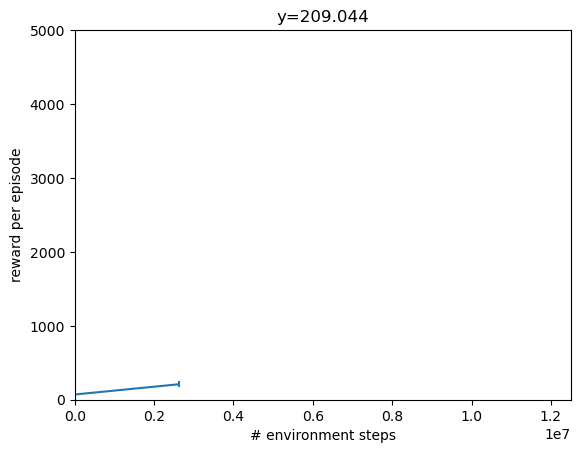

{'eval/walltime': 70.6720757484436, 'training/sps': 49350.292109615824, 'training/walltime': 134.15563130378723, 'training/entropy_loss': Array(-0.012, dtype=float32), 'training/policy_loss': Array(-0.014, dtype=float32), 'training/total_loss': Array(0.039, dtype=float32), 'training/v_loss': Array(0.064, dtype=float32), 'eval/episode_distance_from_origin': Array(50.887, dtype=float32), 'eval/episode_forward_reward': Array(20.561, dtype=float32), 'eval/episode_reward': Array(269.294, dtype=float32), 'eval/episode_reward_alive': Array(277.969, dtype=float32), 'eval/episode_reward_linvel': Array(20.561, dtype=float32), 'eval/episode_reward_quadctrl': Array(-29.236, dtype=float32), 'eval/episode_x_position': Array(9.776, dtype=float32), 'eval/episode_x_velocity': Array(16.449, dtype=float32), 'eval/episode_y_position': Array(1.734, dtype=float32), 'eval/episode_y_velocity': Array(2.11, dtype=float32), 'eval/episode_distance_from_origin_std': Array(12.241, dtype=float32), 'eval/episode_forw

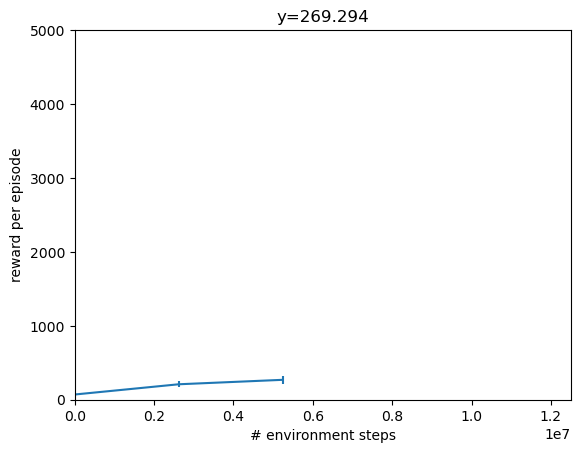

{'eval/walltime': 80.94957661628723, 'training/sps': 49225.097389605246, 'training/walltime': 187.40976667404175, 'training/entropy_loss': Array(-0.011, dtype=float32), 'training/policy_loss': Array(-0.013, dtype=float32), 'training/total_loss': Array(0.04, dtype=float32), 'training/v_loss': Array(0.064, dtype=float32), 'eval/episode_distance_from_origin': Array(65.702, dtype=float32), 'eval/episode_forward_reward': Array(35.327, dtype=float32), 'eval/episode_reward': Array(339.209, dtype=float32), 'eval/episode_reward_alive': Array(338.203, dtype=float32), 'eval/episode_reward_linvel': Array(35.327, dtype=float32), 'eval/episode_reward_quadctrl': Array(-34.32, dtype=float32), 'eval/episode_x_position': Array(21.662, dtype=float32), 'eval/episode_x_velocity': Array(28.261, dtype=float32), 'eval/episode_y_position': Array(4.226, dtype=float32), 'eval/episode_y_velocity': Array(5.238, dtype=float32), 'eval/episode_distance_from_origin_std': Array(16.99, dtype=float32), 'eval/episode_forw

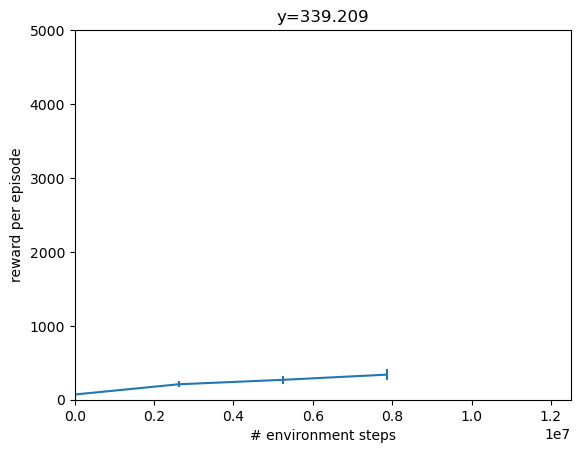

{'eval/walltime': 91.29191613197327, 'training/sps': 49098.97228547056, 'training/walltime': 240.80070090293884, 'training/entropy_loss': Array(-0.009, dtype=float32), 'training/policy_loss': Array(-0.013, dtype=float32), 'training/total_loss': Array(0.041, dtype=float32), 'training/v_loss': Array(0.063, dtype=float32), 'eval/episode_distance_from_origin': Array(104.511, dtype=float32), 'eval/episode_forward_reward': Array(54.176, dtype=float32), 'eval/episode_reward': Array(478.071, dtype=float32), 'eval/episode_reward_alive': Array(470.547, dtype=float32), 'eval/episode_reward_linvel': Array(54.176, dtype=float32), 'eval/episode_reward_quadctrl': Array(-46.651, dtype=float32), 'eval/episode_x_position': Array(52.744, dtype=float32), 'eval/episode_x_velocity': Array(43.34, dtype=float32), 'eval/episode_y_position': Array(5.393, dtype=float32), 'eval/episode_y_velocity': Array(3.1, dtype=float32), 'eval/episode_distance_from_origin_std': Array(43.01, dtype=float32), 'eval/episode_forwa

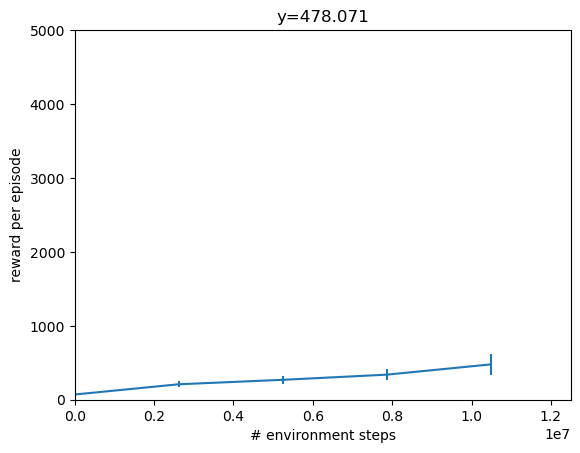

time to jit: 0:01:08.566053
time to train: 0:04:42.295281
1

--------

Iteration1-Robot0

--------



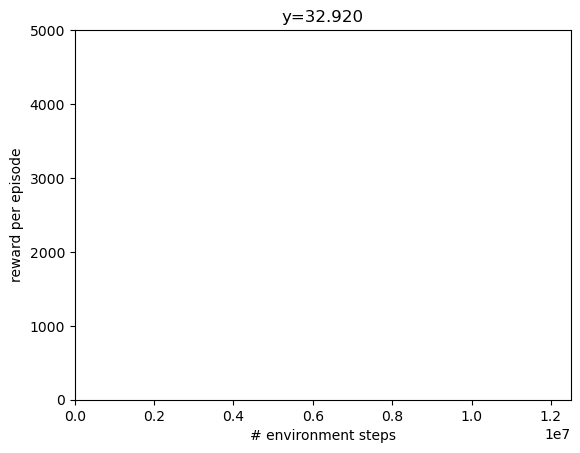

{'eval/walltime': 56.378079414367676, 'training/sps': 32245.961953064852, 'training/walltime': 81.29514026641846, 'training/entropy_loss': Array(-0.012, dtype=float32), 'training/policy_loss': Array(0.008, dtype=float32), 'training/total_loss': Array(0.134, dtype=float32), 'training/v_loss': Array(0.138, dtype=float32), 'eval/episode_distance_from_origin': Array(44.568, dtype=float32), 'eval/episode_forward_reward': Array(23.104, dtype=float32), 'eval/episode_reward': Array(237.806, dtype=float32), 'eval/episode_reward_alive': Array(243.086, dtype=float32), 'eval/episode_reward_linvel': Array(23.104, dtype=float32), 'eval/episode_reward_quadctrl': Array(-28.384, dtype=float32), 'eval/episode_x_position': Array(9.931, dtype=float32), 'eval/episode_x_velocity': Array(18.483, dtype=float32), 'eval/episode_y_position': Array(0.737, dtype=float32), 'eval/episode_y_velocity': Array(1.661, dtype=float32), 'eval/episode_distance_from_origin_std': Array(14.241, dtype=float32), 'eval/episode_for

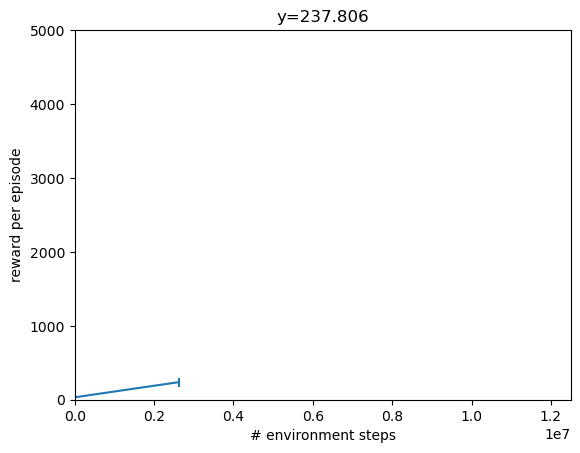

{'eval/walltime': 66.75127482414246, 'training/sps': 49448.42774780759, 'training/walltime': 134.30875706672668, 'training/entropy_loss': Array(-0.011, dtype=float32), 'training/policy_loss': Array(-0.015, dtype=float32), 'training/total_loss': Array(0.089, dtype=float32), 'training/v_loss': Array(0.115, dtype=float32), 'eval/episode_distance_from_origin': Array(76.212, dtype=float32), 'eval/episode_forward_reward': Array(54.202, dtype=float32), 'eval/episode_reward': Array(371.205, dtype=float32), 'eval/episode_reward_alive': Array(357.461, dtype=float32), 'eval/episode_reward_linvel': Array(54.202, dtype=float32), 'eval/episode_reward_quadctrl': Array(-40.457, dtype=float32), 'eval/episode_x_position': Array(36.28, dtype=float32), 'eval/episode_x_velocity': Array(43.361, dtype=float32), 'eval/episode_y_position': Array(0.477, dtype=float32), 'eval/episode_y_velocity': Array(0.794, dtype=float32), 'eval/episode_distance_from_origin_std': Array(24.373, dtype=float32), 'eval/episode_for

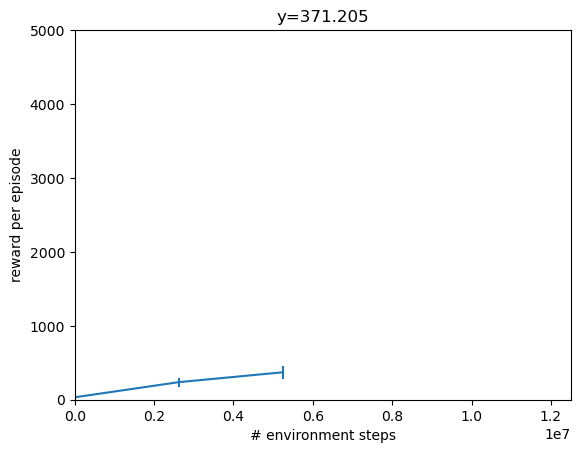

{'eval/walltime': 77.12368416786194, 'training/sps': 49254.58786519466, 'training/walltime': 187.53100728988647, 'training/entropy_loss': Array(-0.01, dtype=float32), 'training/policy_loss': Array(-0.013, dtype=float32), 'training/total_loss': Array(0.121, dtype=float32), 'training/v_loss': Array(0.144, dtype=float32), 'eval/episode_distance_from_origin': Array(157.543, dtype=float32), 'eval/episode_forward_reward': Array(98.852, dtype=float32), 'eval/episode_reward': Array(583.715, dtype=float32), 'eval/episode_reward_alive': Array(545.625, dtype=float32), 'eval/episode_reward_linvel': Array(98.852, dtype=float32), 'eval/episode_reward_quadctrl': Array(-60.762, dtype=float32), 'eval/episode_x_position': Array(108.726, dtype=float32), 'eval/episode_x_velocity': Array(79.082, dtype=float32), 'eval/episode_y_position': Array(3.324, dtype=float32), 'eval/episode_y_velocity': Array(2.748, dtype=float32), 'eval/episode_distance_from_origin_std': Array(89.269, dtype=float32), 'eval/episode_f

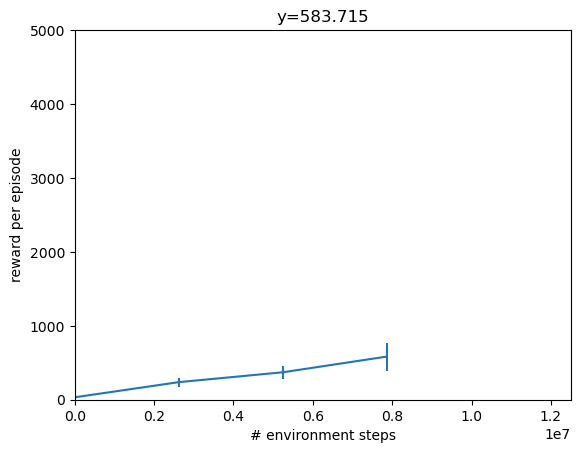

{'eval/walltime': 87.60060906410217, 'training/sps': 49167.001647557845, 'training/walltime': 240.84806776046753, 'training/entropy_loss': Array(-0.009, dtype=float32), 'training/policy_loss': Array(-0.011, dtype=float32), 'training/total_loss': Array(0.149, dtype=float32), 'training/v_loss': Array(0.169, dtype=float32), 'eval/episode_distance_from_origin': Array(615.403, dtype=float32), 'eval/episode_forward_reward': Array(232.121, dtype=float32), 'eval/episode_reward': Array(1145.113, dtype=float32), 'eval/episode_reward_alive': Array(1025.82, dtype=float32), 'eval/episode_reward_linvel': Array(232.121, dtype=float32), 'eval/episode_reward_quadctrl': Array(-112.829, dtype=float32), 'eval/episode_x_position': Array(547.714, dtype=float32), 'eval/episode_x_velocity': Array(185.697, dtype=float32), 'eval/episode_y_position': Array(89.073, dtype=float32), 'eval/episode_y_velocity': Array(37.825, dtype=float32), 'eval/episode_distance_from_origin_std': Array(684.397, dtype=float32), 'eval

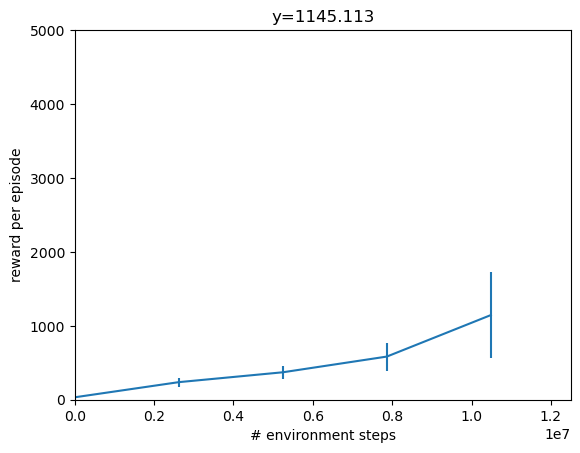

time to jit: 0:01:02.511700
time to train: 0:04:42.589311

--------

Iteration1-Robot1

--------



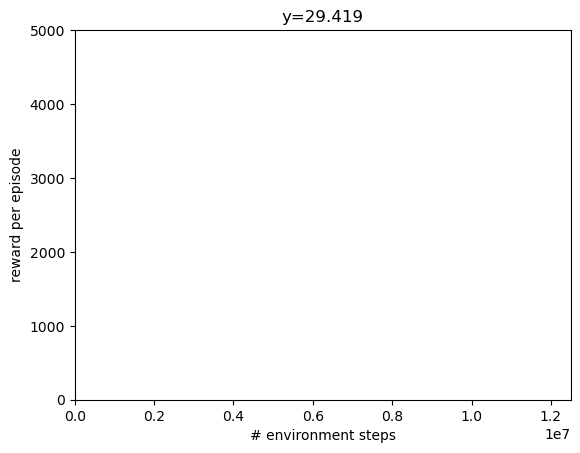

{'eval/walltime': 58.26749038696289, 'training/sps': 32294.671541756456, 'training/walltime': 81.17252397537231, 'training/entropy_loss': Array(-0.01, dtype=float32), 'training/policy_loss': Array(0.018, dtype=float32), 'training/total_loss': Array(0.159, dtype=float32), 'training/v_loss': Array(0.152, dtype=float32), 'eval/episode_distance_from_origin': Array(45.71, dtype=float32), 'eval/episode_forward_reward': Array(28.772, dtype=float32), 'eval/episode_reward': Array(241.292, dtype=float32), 'eval/episode_reward_alive': Array(241.719, dtype=float32), 'eval/episode_reward_linvel': Array(28.772, dtype=float32), 'eval/episode_reward_quadctrl': Array(-29.198, dtype=float32), 'eval/episode_x_position': Array(12.018, dtype=float32), 'eval/episode_x_velocity': Array(23.017, dtype=float32), 'eval/episode_y_position': Array(1.072, dtype=float32), 'eval/episode_y_velocity': Array(4.26, dtype=float32), 'eval/episode_distance_from_origin_std': Array(11.132, dtype=float32), 'eval/episode_forwar

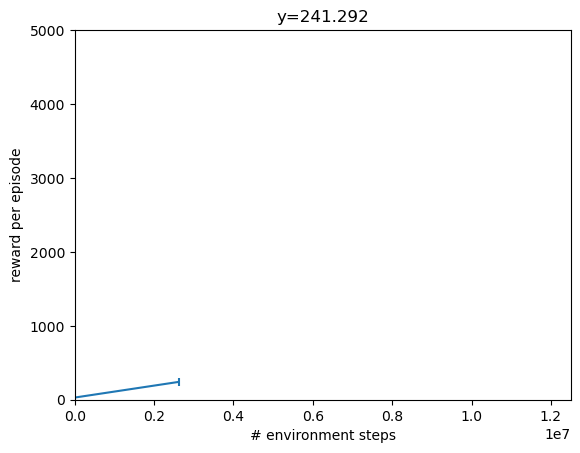

{'eval/walltime': 68.64692115783691, 'training/sps': 49335.3334524219, 'training/walltime': 134.30766701698303, 'training/entropy_loss': Array(-0.009, dtype=float32), 'training/policy_loss': Array(-0.013, dtype=float32), 'training/total_loss': Array(0.092, dtype=float32), 'training/v_loss': Array(0.115, dtype=float32), 'eval/episode_distance_from_origin': Array(70.204, dtype=float32), 'eval/episode_forward_reward': Array(49.952, dtype=float32), 'eval/episode_reward': Array(345.482, dtype=float32), 'eval/episode_reward_alive': Array(334.492, dtype=float32), 'eval/episode_reward_linvel': Array(49.952, dtype=float32), 'eval/episode_reward_quadctrl': Array(-38.962, dtype=float32), 'eval/episode_x_position': Array(31.06, dtype=float32), 'eval/episode_x_velocity': Array(39.962, dtype=float32), 'eval/episode_y_position': Array(3.176, dtype=float32), 'eval/episode_y_velocity': Array(6.095, dtype=float32), 'eval/episode_distance_from_origin_std': Array(20.963, dtype=float32), 'eval/episode_forw

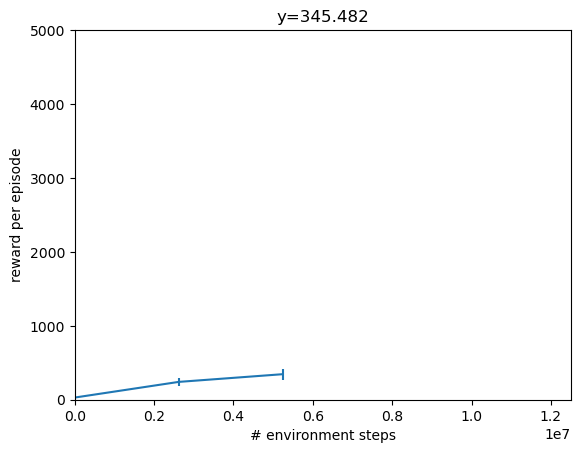

{'eval/walltime': 79.01999759674072, 'training/sps': 49200.00685239888, 'training/walltime': 187.58896040916443, 'training/entropy_loss': Array(-0.008, dtype=float32), 'training/policy_loss': Array(-0.012, dtype=float32), 'training/total_loss': Array(0.083, dtype=float32), 'training/v_loss': Array(0.103, dtype=float32), 'eval/episode_distance_from_origin': Array(113.148, dtype=float32), 'eval/episode_forward_reward': Array(75.617, dtype=float32), 'eval/episode_reward': Array(478.435, dtype=float32), 'eval/episode_reward_alive': Array(454.727, dtype=float32), 'eval/episode_reward_linvel': Array(75.617, dtype=float32), 'eval/episode_reward_quadctrl': Array(-51.909, dtype=float32), 'eval/episode_x_position': Array(67.981, dtype=float32), 'eval/episode_x_velocity': Array(60.493, dtype=float32), 'eval/episode_y_position': Array(10.575, dtype=float32), 'eval/episode_y_velocity': Array(12.628, dtype=float32), 'eval/episode_distance_from_origin_std': Array(50.339, dtype=float32), 'eval/episode

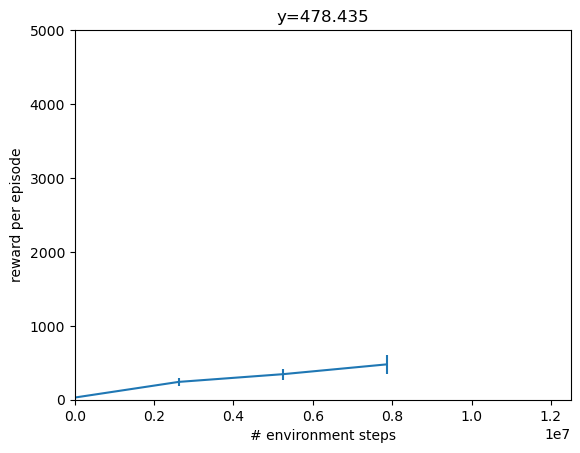

{'eval/walltime': 89.43248343467712, 'training/sps': 49127.48971870143, 'training/walltime': 240.94890236854553, 'training/entropy_loss': Array(-0.007, dtype=float32), 'training/policy_loss': Array(-0.011, dtype=float32), 'training/total_loss': Array(0.126, dtype=float32), 'training/v_loss': Array(0.144, dtype=float32), 'eval/episode_distance_from_origin': Array(270.584, dtype=float32), 'eval/episode_forward_reward': Array(131.98, dtype=float32), 'eval/episode_reward': Array(767.376, dtype=float32), 'eval/episode_reward_alive': Array(716.133, dtype=float32), 'eval/episode_reward_linvel': Array(131.98, dtype=float32), 'eval/episode_reward_quadctrl': Array(-80.737, dtype=float32), 'eval/episode_x_position': Array(212.547, dtype=float32), 'eval/episode_x_velocity': Array(105.584, dtype=float32), 'eval/episode_y_position': Array(38.134, dtype=float32), 'eval/episode_y_velocity': Array(16.893, dtype=float32), 'eval/episode_distance_from_origin_std': Array(223.801, dtype=float32), 'eval/epis

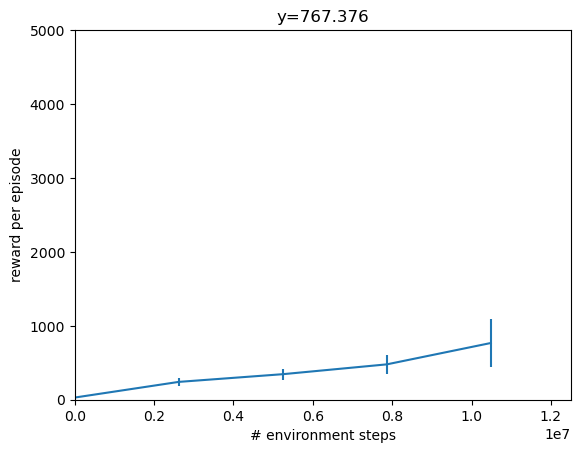

time to jit: 0:01:05.963577
time to train: 0:04:42.707714

--------

Iteration1-Robot2

--------



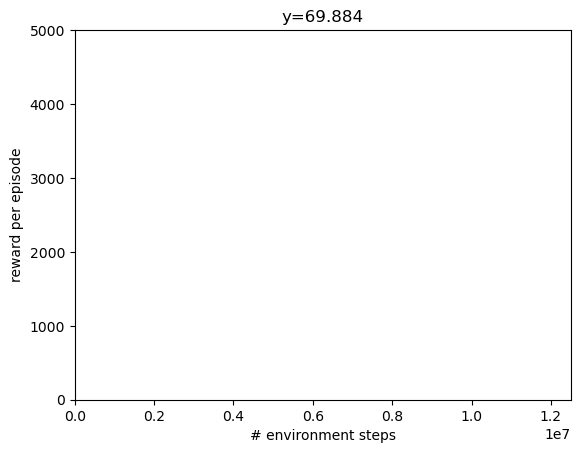

{'eval/walltime': 59.35495591163635, 'training/sps': 32536.807885266895, 'training/walltime': 80.56844449043274, 'training/entropy_loss': Array(-0.011, dtype=float32), 'training/policy_loss': Array(0.018, dtype=float32), 'training/total_loss': Array(0.145, dtype=float32), 'training/v_loss': Array(0.138, dtype=float32), 'eval/episode_distance_from_origin': Array(58.77, dtype=float32), 'eval/episode_forward_reward': Array(37.467, dtype=float32), 'eval/episode_reward': Array(296.512, dtype=float32), 'eval/episode_reward_alive': Array(293.164, dtype=float32), 'eval/episode_reward_linvel': Array(37.467, dtype=float32), 'eval/episode_reward_quadctrl': Array(-34.119, dtype=float32), 'eval/episode_x_position': Array(21.549, dtype=float32), 'eval/episode_x_velocity': Array(29.973, dtype=float32), 'eval/episode_y_position': Array(2.396, dtype=float32), 'eval/episode_y_velocity': Array(4.421, dtype=float32), 'eval/episode_distance_from_origin_std': Array(21.511, dtype=float32), 'eval/episode_forw

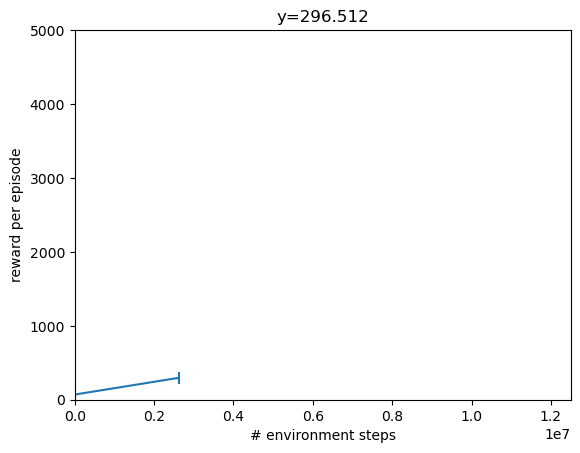

{'eval/walltime': 69.7013611793518, 'training/sps': 49335.052315713736, 'training/walltime': 133.70389032363892, 'training/entropy_loss': Array(-0.01, dtype=float32), 'training/policy_loss': Array(-0.013, dtype=float32), 'training/total_loss': Array(0.078, dtype=float32), 'training/v_loss': Array(0.101, dtype=float32), 'eval/episode_distance_from_origin': Array(98.817, dtype=float32), 'eval/episode_forward_reward': Array(65.599, dtype=float32), 'eval/episode_reward': Array(438.088, dtype=float32), 'eval/episode_reward_alive': Array(420.039, dtype=float32), 'eval/episode_reward_linvel': Array(65.599, dtype=float32), 'eval/episode_reward_quadctrl': Array(-47.55, dtype=float32), 'eval/episode_x_position': Array(55.503, dtype=float32), 'eval/episode_x_velocity': Array(52.479, dtype=float32), 'eval/episode_y_position': Array(1.864, dtype=float32), 'eval/episode_y_velocity': Array(3.607, dtype=float32), 'eval/episode_distance_from_origin_std': Array(36.984, dtype=float32), 'eval/episode_forw

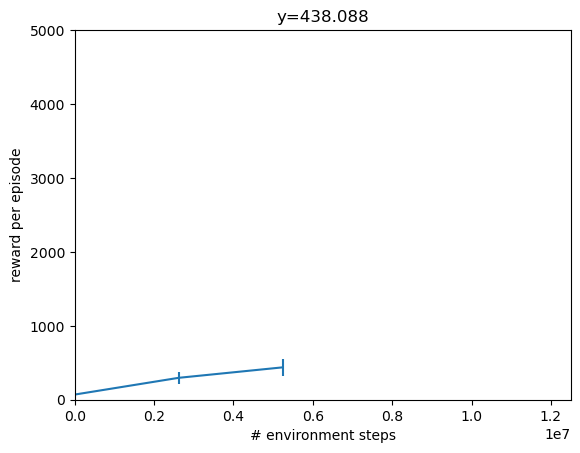

{'eval/walltime': 80.0494794845581, 'training/sps': 49195.47271743016, 'training/walltime': 186.99009442329407, 'training/entropy_loss': Array(-0.008, dtype=float32), 'training/policy_loss': Array(-0.012, dtype=float32), 'training/total_loss': Array(0.107, dtype=float32), 'training/v_loss': Array(0.127, dtype=float32), 'eval/episode_distance_from_origin': Array(208.661, dtype=float32), 'eval/episode_forward_reward': Array(111.835, dtype=float32), 'eval/episode_reward': Array(673.067, dtype=float32), 'eval/episode_reward_alive': Array(631.641, dtype=float32), 'eval/episode_reward_linvel': Array(111.835, dtype=float32), 'eval/episode_reward_quadctrl': Array(-70.409, dtype=float32), 'eval/episode_x_position': Array(156.629, dtype=float32), 'eval/episode_x_velocity': Array(89.468, dtype=float32), 'eval/episode_y_position': Array(18.286, dtype=float32), 'eval/episode_y_velocity': Array(11.203, dtype=float32), 'eval/episode_distance_from_origin_std': Array(152.417, dtype=float32), 'eval/epis

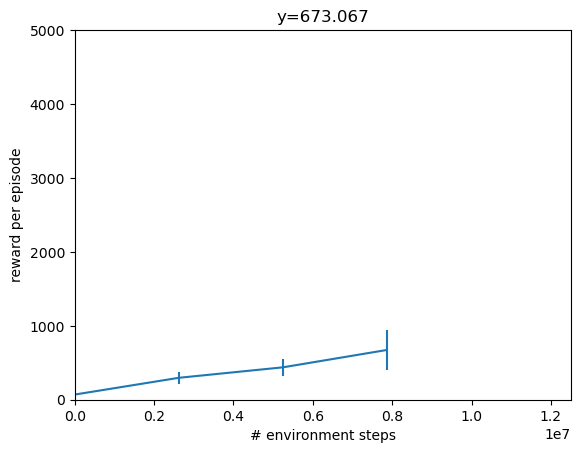

{'eval/walltime': 90.45146870613098, 'training/sps': 49155.5291352112, 'training/walltime': 240.31959867477417, 'training/entropy_loss': Array(-0.007, dtype=float32), 'training/policy_loss': Array(-0.011, dtype=float32), 'training/total_loss': Array(0.116, dtype=float32), 'training/v_loss': Array(0.134, dtype=float32), 'eval/episode_distance_from_origin': Array(1066.755, dtype=float32), 'eval/episode_forward_reward': Array(271.33, dtype=float32), 'eval/episode_reward': Array(1513.055, dtype=float32), 'eval/episode_reward_alive': Array(1392.305, dtype=float32), 'eval/episode_reward_linvel': Array(271.33, dtype=float32), 'eval/episode_reward_quadctrl': Array(-150.579, dtype=float32), 'eval/episode_x_position': Array(969.896, dtype=float32), 'eval/episode_x_velocity': Array(217.064, dtype=float32), 'eval/episode_y_position': Array(183.506, dtype=float32), 'eval/episode_y_velocity': Array(44.227, dtype=float32), 'eval/episode_distance_from_origin_std': Array(1345.702, dtype=float32), 'eval

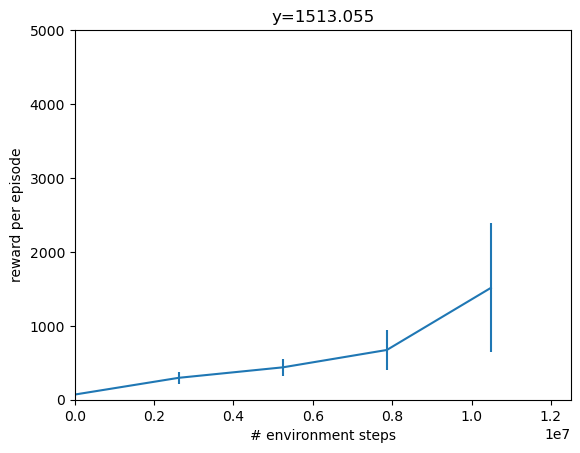

time to jit: 0:01:07.282355
time to train: 0:04:42.066973

--------

Iteration1-Robot3

--------



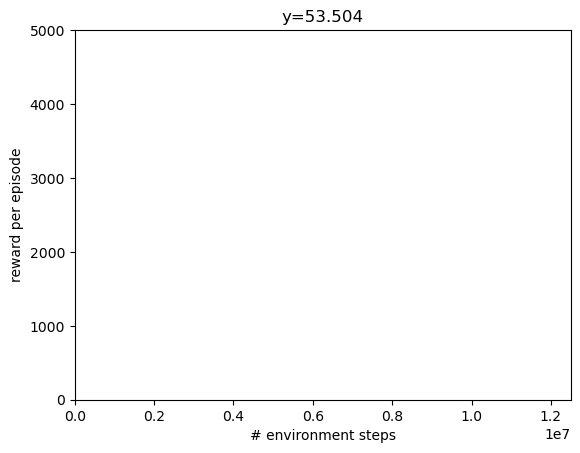

{'eval/walltime': 59.33141326904297, 'training/sps': 32058.224811441974, 'training/walltime': 81.7712152004242, 'training/entropy_loss': Array(-0.012, dtype=float32), 'training/policy_loss': Array(0.008, dtype=float32), 'training/total_loss': Array(0.143, dtype=float32), 'training/v_loss': Array(0.147, dtype=float32), 'eval/episode_distance_from_origin': Array(41.91, dtype=float32), 'eval/episode_forward_reward': Array(24.078, dtype=float32), 'eval/episode_reward': Array(216.051, dtype=float32), 'eval/episode_reward_alive': Array(217.891, dtype=float32), 'eval/episode_reward_linvel': Array(24.078, dtype=float32), 'eval/episode_reward_quadctrl': Array(-25.918, dtype=float32), 'eval/episode_x_position': Array(9.598, dtype=float32), 'eval/episode_x_velocity': Array(19.262, dtype=float32), 'eval/episode_y_position': Array(4.047, dtype=float32), 'eval/episode_y_velocity': Array(11.191, dtype=float32), 'eval/episode_distance_from_origin_std': Array(8.278, dtype=float32), 'eval/episode_forwar

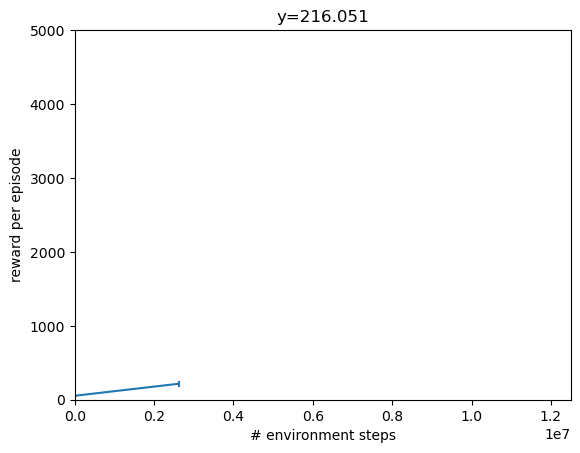

{'eval/walltime': 69.68530893325806, 'training/sps': 49296.34428435893, 'training/walltime': 134.9483835697174, 'training/entropy_loss': Array(-0.011, dtype=float32), 'training/policy_loss': Array(-0.015, dtype=float32), 'training/total_loss': Array(0.066, dtype=float32), 'training/v_loss': Array(0.092, dtype=float32), 'eval/episode_distance_from_origin': Array(72.36, dtype=float32), 'eval/episode_forward_reward': Array(44.657, dtype=float32), 'eval/episode_reward': Array(345.521, dtype=float32), 'eval/episode_reward_alive': Array(338.984, dtype=float32), 'eval/episode_reward_linvel': Array(44.657, dtype=float32), 'eval/episode_reward_quadctrl': Array(-38.12, dtype=float32), 'eval/episode_x_position': Array(30.664, dtype=float32), 'eval/episode_x_velocity': Array(35.726, dtype=float32), 'eval/episode_y_position': Array(5.985, dtype=float32), 'eval/episode_y_velocity': Array(5.712, dtype=float32), 'eval/episode_distance_from_origin_std': Array(15.31, dtype=float32), 'eval/episode_forwar

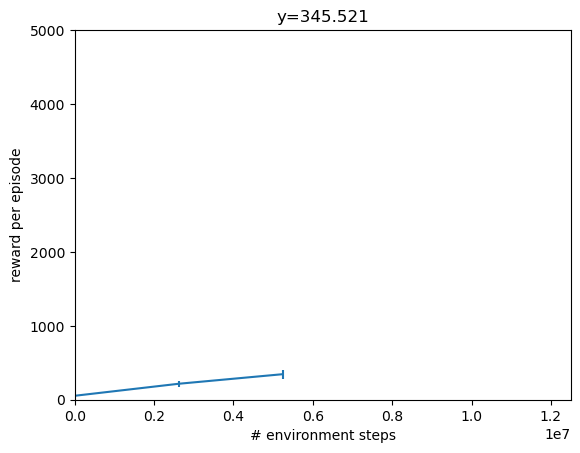

{'eval/walltime': 80.05050778388977, 'training/sps': 49120.47723637528, 'training/walltime': 188.31594324111938, 'training/entropy_loss': Array(-0.01, dtype=float32), 'training/policy_loss': Array(-0.012, dtype=float32), 'training/total_loss': Array(0.051, dtype=float32), 'training/v_loss': Array(0.073, dtype=float32), 'eval/episode_distance_from_origin': Array(112.289, dtype=float32), 'eval/episode_forward_reward': Array(71.71, dtype=float32), 'eval/episode_reward': Array(468.539, dtype=float32), 'eval/episode_reward_alive': Array(445.156, dtype=float32), 'eval/episode_reward_linvel': Array(71.71, dtype=float32), 'eval/episode_reward_quadctrl': Array(-48.327, dtype=float32), 'eval/episode_x_position': Array(65.484, dtype=float32), 'eval/episode_x_velocity': Array(57.368, dtype=float32), 'eval/episode_y_position': Array(7.716, dtype=float32), 'eval/episode_y_velocity': Array(4.123, dtype=float32), 'eval/episode_distance_from_origin_std': Array(45.245, dtype=float32), 'eval/episode_forw

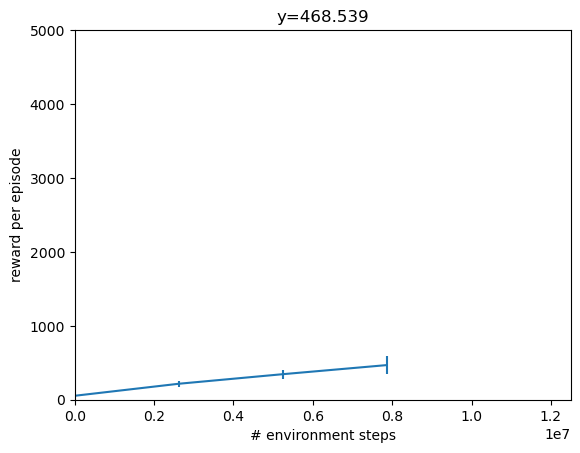

time to jit: 0:01:07.782265
time to train: 0:03:39.577873
2

--------

Iteration2-Robot0

--------



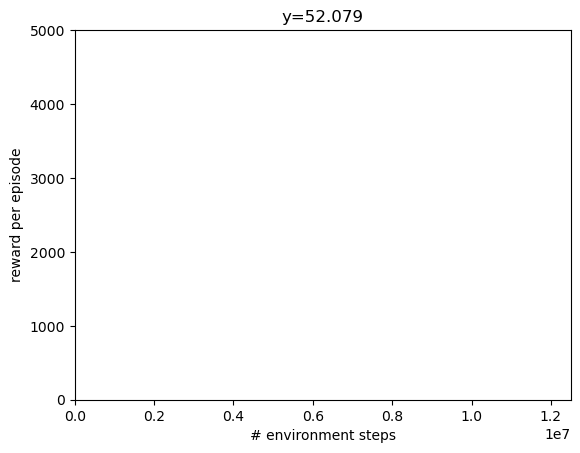

{'eval/walltime': 59.37867975234985, 'training/sps': 32420.015221530062, 'training/walltime': 80.85869121551514, 'training/entropy_loss': Array(-0.006, dtype=float32), 'training/policy_loss': Array(-0.004, dtype=float32), 'training/total_loss': Array(0.078, dtype=float32), 'training/v_loss': Array(0.088, dtype=float32), 'eval/episode_distance_from_origin': Array(30.953, dtype=float32), 'eval/episode_forward_reward': Array(25.188, dtype=float32), 'eval/episode_reward': Array(167.514, dtype=float32), 'eval/episode_reward_alive': Array(162.93, dtype=float32), 'eval/episode_reward_linvel': Array(25.188, dtype=float32), 'eval/episode_reward_quadctrl': Array(-20.603, dtype=float32), 'eval/episode_x_position': Array(7.422, dtype=float32), 'eval/episode_x_velocity': Array(20.15, dtype=float32), 'eval/episode_y_position': Array(0.629, dtype=float32), 'eval/episode_y_velocity': Array(1.145, dtype=float32), 'eval/episode_distance_from_origin_std': Array(10.451, dtype=float32), 'eval/episode_forwa

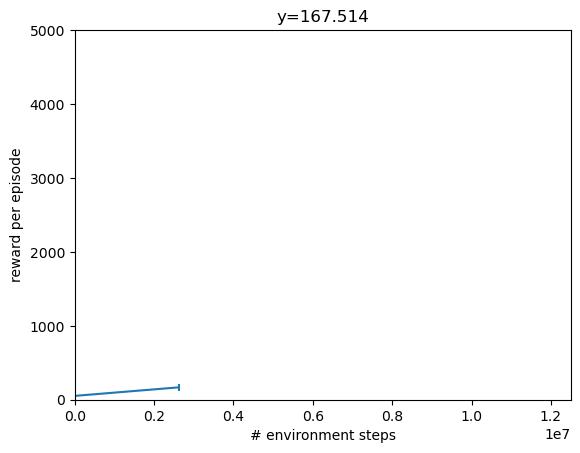

{'eval/walltime': 69.78818416595459, 'training/sps': 49337.20364649906, 'training/walltime': 133.9918200969696, 'training/entropy_loss': Array(-0.005, dtype=float32), 'training/policy_loss': Array(-0.017, dtype=float32), 'training/total_loss': Array(0.172, dtype=float32), 'training/v_loss': Array(0.194, dtype=float32), 'eval/episode_distance_from_origin': Array(72.614, dtype=float32), 'eval/episode_forward_reward': Array(50.636, dtype=float32), 'eval/episode_reward': Array(337.225, dtype=float32), 'eval/episode_reward_alive': Array(323.555, dtype=float32), 'eval/episode_reward_linvel': Array(50.636, dtype=float32), 'eval/episode_reward_quadctrl': Array(-36.966, dtype=float32), 'eval/episode_x_position': Array(32.276, dtype=float32), 'eval/episode_x_velocity': Array(40.509, dtype=float32), 'eval/episode_y_position': Array(14.183, dtype=float32), 'eval/episode_y_velocity': Array(16.429, dtype=float32), 'eval/episode_distance_from_origin_std': Array(28.713, dtype=float32), 'eval/episode_f

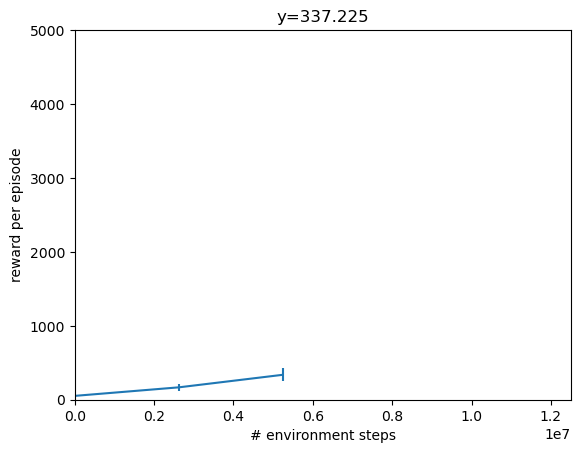

{'eval/walltime': 80.16669487953186, 'training/sps': 49197.97951945792, 'training/walltime': 187.27530908584595, 'training/entropy_loss': Array(-0.005, dtype=float32), 'training/policy_loss': Array(-0.011, dtype=float32), 'training/total_loss': Array(0.146, dtype=float32), 'training/v_loss': Array(0.162, dtype=float32), 'eval/episode_distance_from_origin': Array(125.626, dtype=float32), 'eval/episode_forward_reward': Array(84.365, dtype=float32), 'eval/episode_reward': Array(479.575, dtype=float32), 'eval/episode_reward_alive': Array(444.102, dtype=float32), 'eval/episode_reward_linvel': Array(84.365, dtype=float32), 'eval/episode_reward_quadctrl': Array(-48.891, dtype=float32), 'eval/episode_x_position': Array(76.925, dtype=float32), 'eval/episode_x_velocity': Array(67.492, dtype=float32), 'eval/episode_y_position': Array(32.203, dtype=float32), 'eval/episode_y_velocity': Array(25.56, dtype=float32), 'eval/episode_distance_from_origin_std': Array(68.933, dtype=float32), 'eval/episode_

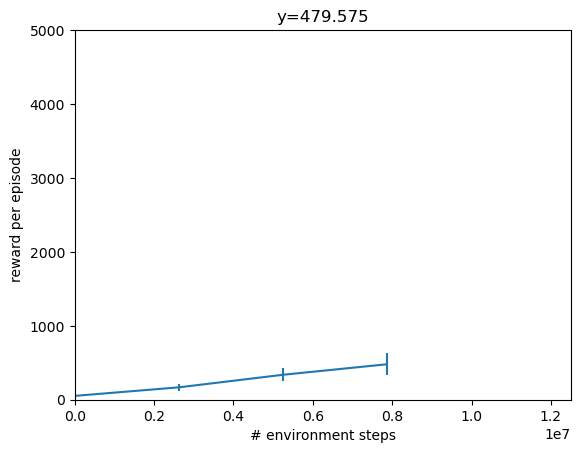

{'eval/walltime': 90.52966570854187, 'training/sps': 49157.95406588962, 'training/walltime': 240.60218262672424, 'training/entropy_loss': Array(-0.004, dtype=float32), 'training/policy_loss': Array(-0.01, dtype=float32), 'training/total_loss': Array(0.163, dtype=float32), 'training/v_loss': Array(0.176, dtype=float32), 'eval/episode_distance_from_origin': Array(292.879, dtype=float32), 'eval/episode_forward_reward': Array(155.728, dtype=float32), 'eval/episode_reward': Array(729.541, dtype=float32), 'eval/episode_reward_alive': Array(642.656, dtype=float32), 'eval/episode_reward_linvel': Array(155.728, dtype=float32), 'eval/episode_reward_quadctrl': Array(-68.844, dtype=float32), 'eval/episode_x_position': Array(228.73, dtype=float32), 'eval/episode_x_velocity': Array(124.583, dtype=float32), 'eval/episode_y_position': Array(90.569, dtype=float32), 'eval/episode_y_velocity': Array(45.937, dtype=float32), 'eval/episode_distance_from_origin_std': Array(271.313, dtype=float32), 'eval/epis

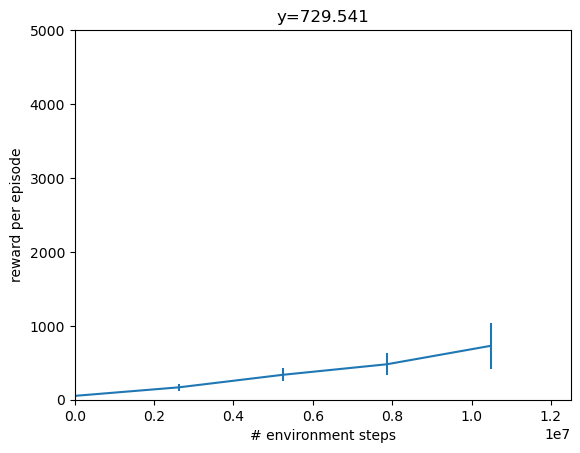

time to jit: 0:01:07.663953
time to train: 0:04:42.378099

--------

Iteration2-Robot1

--------



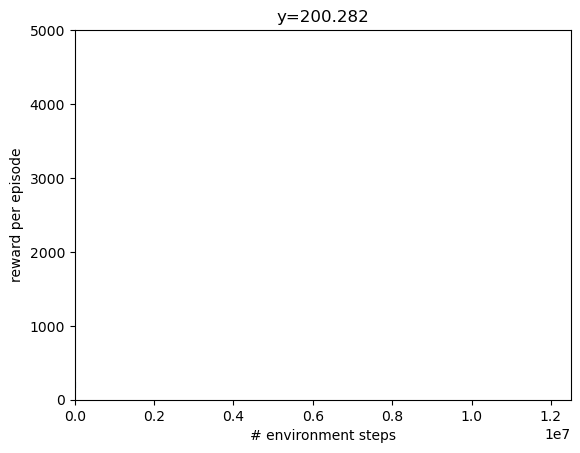

{'eval/walltime': 60.87204933166504, 'training/sps': 32434.179033518234, 'training/walltime': 80.82338070869446, 'training/entropy_loss': Array(-0.007, dtype=float32), 'training/policy_loss': Array(-0.015, dtype=float32), 'training/total_loss': Array(0.103, dtype=float32), 'training/v_loss': Array(0.125, dtype=float32), 'eval/episode_distance_from_origin': Array(116.16, dtype=float32), 'eval/episode_forward_reward': Array(61.778, dtype=float32), 'eval/episode_reward': Array(465.702, dtype=float32), 'eval/episode_reward_alive': Array(454.219, dtype=float32), 'eval/episode_reward_linvel': Array(61.778, dtype=float32), 'eval/episode_reward_quadctrl': Array(-50.294, dtype=float32), 'eval/episode_x_position': Array(63.624, dtype=float32), 'eval/episode_x_velocity': Array(49.422, dtype=float32), 'eval/episode_y_position': Array(17.626, dtype=float32), 'eval/episode_y_velocity': Array(12.367, dtype=float32), 'eval/episode_distance_from_origin_std': Array(73.1, dtype=float32), 'eval/episode_fo

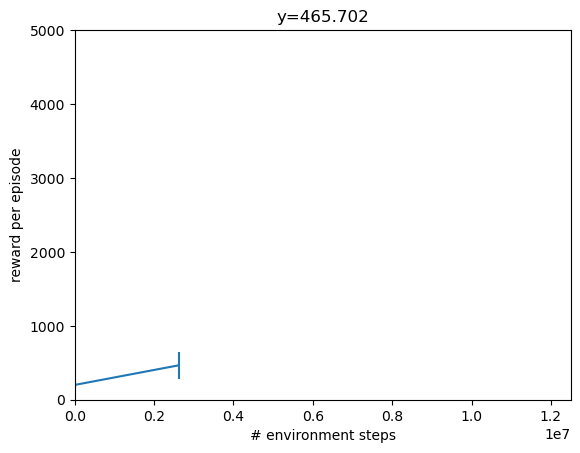

{'eval/walltime': 71.2265956401825, 'training/sps': 49378.04364876791, 'training/walltime': 133.91256380081177, 'training/entropy_loss': Array(-0.006, dtype=float32), 'training/policy_loss': Array(-0.013, dtype=float32), 'training/total_loss': Array(0.13, dtype=float32), 'training/v_loss': Array(0.149, dtype=float32), 'eval/episode_distance_from_origin': Array(685.917, dtype=float32), 'eval/episode_forward_reward': Array(201.36, dtype=float32), 'eval/episode_reward': Array(1190.203, dtype=float32), 'eval/episode_reward_alive': Array(1106.25, dtype=float32), 'eval/episode_reward_linvel': Array(201.36, dtype=float32), 'eval/episode_reward_quadctrl': Array(-117.407, dtype=float32), 'eval/episode_x_position': Array(594.205, dtype=float32), 'eval/episode_x_velocity': Array(161.088, dtype=float32), 'eval/episode_y_position': Array(143.134, dtype=float32), 'eval/episode_y_velocity': Array(47.587, dtype=float32), 'eval/episode_distance_from_origin_std': Array(749.023, dtype=float32), 'eval/epi

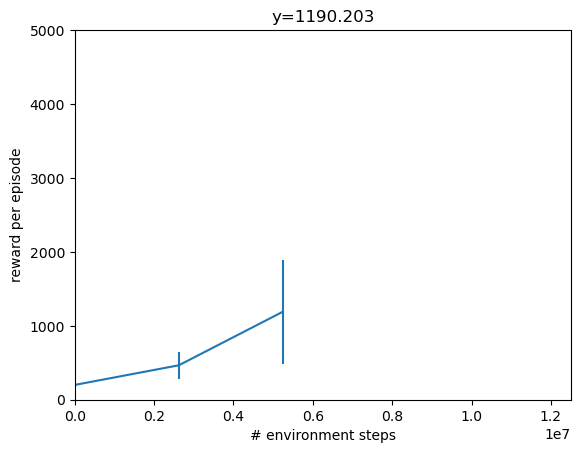

{'eval/walltime': 81.54521441459656, 'training/sps': 49273.198333845874, 'training/walltime': 187.1147119998932, 'training/entropy_loss': Array(-0.005, dtype=float32), 'training/policy_loss': Array(-0.011, dtype=float32), 'training/total_loss': Array(0.082, dtype=float32), 'training/v_loss': Array(0.098, dtype=float32), 'eval/episode_distance_from_origin': Array(3940.202, dtype=float32), 'eval/episode_forward_reward': Array(572.544, dtype=float32), 'eval/episode_reward': Array(2703.58, dtype=float32), 'eval/episode_reward_alive': Array(2378.398, dtype=float32), 'eval/episode_reward_linvel': Array(572.544, dtype=float32), 'eval/episode_reward_quadctrl': Array(-247.362, dtype=float32), 'eval/episode_x_position': Array(3789.544, dtype=float32), 'eval/episode_x_velocity': Array(458.036, dtype=float32), 'eval/episode_y_position': Array(570.094, dtype=float32), 'eval/episode_y_velocity': Array(89.595, dtype=float32), 'eval/episode_distance_from_origin_std': Array(4228.638, dtype=float32), 'e

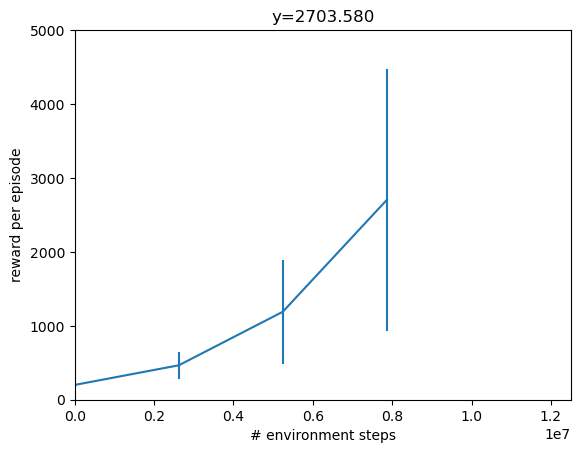

{'eval/walltime': 91.87783646583557, 'training/sps': 49175.30542980243, 'training/walltime': 240.4227693080902, 'training/entropy_loss': Array(-0.004, dtype=float32), 'training/policy_loss': Array(-0.01, dtype=float32), 'training/total_loss': Array(0.07, dtype=float32), 'training/v_loss': Array(0.083, dtype=float32), 'eval/episode_distance_from_origin': Array(6291.985, dtype=float32), 'eval/episode_forward_reward': Array(869.97, dtype=float32), 'eval/episode_reward': Array(3279.76, dtype=float32), 'eval/episode_reward_alive': Array(2693.711, dtype=float32), 'eval/episode_reward_linvel': Array(869.97, dtype=float32), 'eval/episode_reward_quadctrl': Array(-283.921, dtype=float32), 'eval/episode_x_position': Array(6120.943, dtype=float32), 'eval/episode_x_velocity': Array(695.978, dtype=float32), 'eval/episode_y_position': Array(1036.67, dtype=float32), 'eval/episode_y_velocity': Array(132.059, dtype=float32), 'eval/episode_distance_from_origin_std': Array(6130.455, dtype=float32), 'eval/

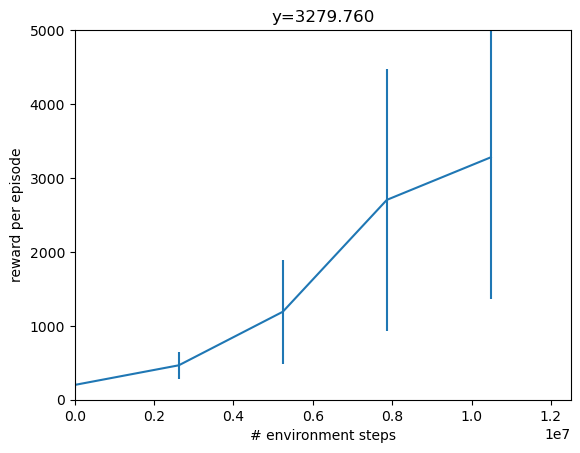

time to jit: 0:01:08.459222
time to train: 0:04:42.082491

--------

Iteration2-Robot2

--------



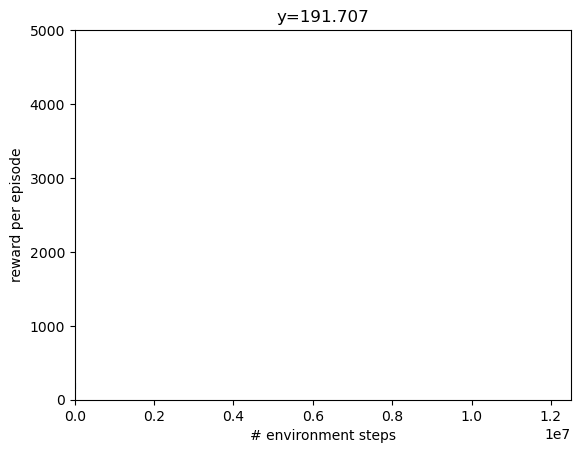

{'eval/walltime': 60.160568714141846, 'training/sps': 32265.047332397236, 'training/walltime': 81.24705266952515, 'training/entropy_loss': Array(-0.008, dtype=float32), 'training/policy_loss': Array(-0.015, dtype=float32), 'training/total_loss': Array(0.1, dtype=float32), 'training/v_loss': Array(0.123, dtype=float32), 'eval/episode_distance_from_origin': Array(73.104, dtype=float32), 'eval/episode_forward_reward': Array(46.349, dtype=float32), 'eval/episode_reward': Array(351.403, dtype=float32), 'eval/episode_reward_alive': Array(341.484, dtype=float32), 'eval/episode_reward_linvel': Array(46.349, dtype=float32), 'eval/episode_reward_quadctrl': Array(-36.431, dtype=float32), 'eval/episode_x_position': Array(32.53, dtype=float32), 'eval/episode_x_velocity': Array(37.08, dtype=float32), 'eval/episode_y_position': Array(6.93, dtype=float32), 'eval/episode_y_velocity': Array(5.691, dtype=float32), 'eval/episode_distance_from_origin_std': Array(33.629, dtype=float32), 'eval/episode_forwar

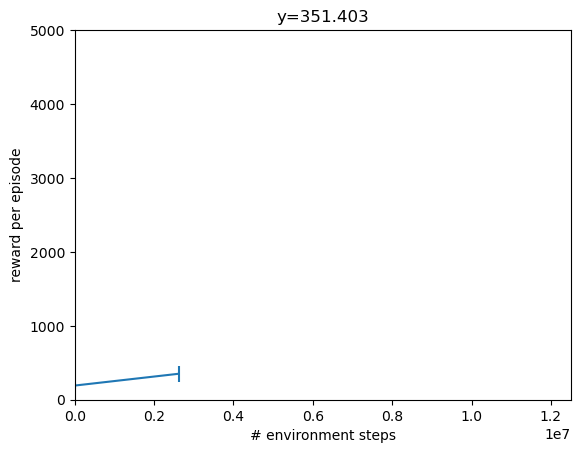

{'eval/walltime': 70.5154287815094, 'training/sps': 49380.05524489639, 'training/walltime': 134.33407306671143, 'training/entropy_loss': Array(-0.007, dtype=float32), 'training/policy_loss': Array(-0.014, dtype=float32), 'training/total_loss': Array(0.124, dtype=float32), 'training/v_loss': Array(0.144, dtype=float32), 'eval/episode_distance_from_origin': Array(297.832, dtype=float32), 'eval/episode_forward_reward': Array(117.315, dtype=float32), 'eval/episode_reward': Array(783.398, dtype=float32), 'eval/episode_reward_alive': Array(743.789, dtype=float32), 'eval/episode_reward_linvel': Array(117.315, dtype=float32), 'eval/episode_reward_quadctrl': Array(-77.706, dtype=float32), 'eval/episode_x_position': Array(226.345, dtype=float32), 'eval/episode_x_velocity': Array(93.852, dtype=float32), 'eval/episode_y_position': Array(71.769, dtype=float32), 'eval/episode_y_velocity': Array(35.055, dtype=float32), 'eval/episode_distance_from_origin_std': Array(281.009, dtype=float32), 'eval/epis

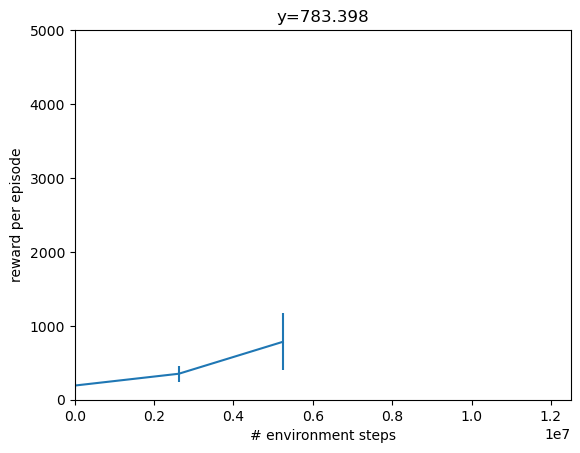

{'eval/walltime': 80.83904480934143, 'training/sps': 49265.25128518553, 'training/walltime': 187.5448033809662, 'training/entropy_loss': Array(-0.005, dtype=float32), 'training/policy_loss': Array(-0.011, dtype=float32), 'training/total_loss': Array(0.109, dtype=float32), 'training/v_loss': Array(0.126, dtype=float32), 'eval/episode_distance_from_origin': Array(2439.573, dtype=float32), 'eval/episode_forward_reward': Array(429.247, dtype=float32), 'eval/episode_reward': Array(2156.385, dtype=float32), 'eval/episode_reward_alive': Array(1927.656, dtype=float32), 'eval/episode_reward_linvel': Array(429.247, dtype=float32), 'eval/episode_reward_quadctrl': Array(-200.519, dtype=float32), 'eval/episode_x_position': Array(2226.957, dtype=float32), 'eval/episode_x_velocity': Array(343.399, dtype=float32), 'eval/episode_y_position': Array(769.093, dtype=float32), 'eval/episode_y_velocity': Array(130.361, dtype=float32), 'eval/episode_distance_from_origin_std': Array(2990.804, dtype=float32), '

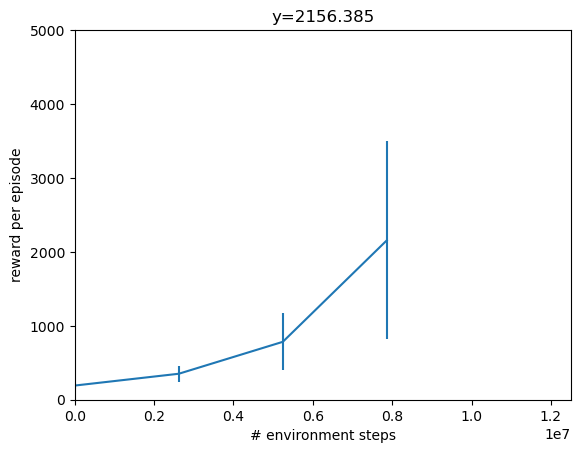

time to jit: 0:01:09.372192
time to train: 0:03:38.982989

--------

Iteration2-Robot3

--------



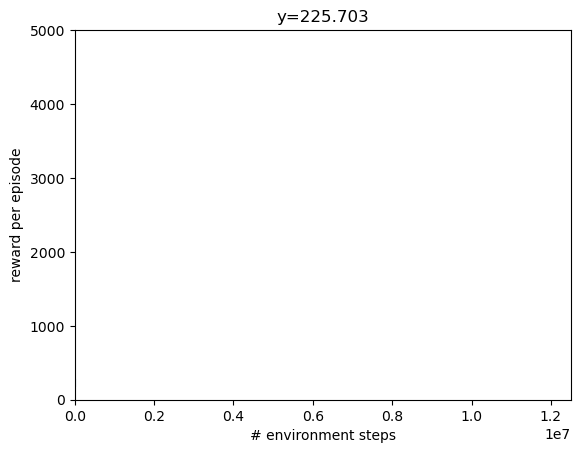

{'eval/walltime': 60.227625370025635, 'training/sps': 32186.805706576284, 'training/walltime': 81.44455289840698, 'training/entropy_loss': Array(-0.007, dtype=float32), 'training/policy_loss': Array(-0.016, dtype=float32), 'training/total_loss': Array(0.106, dtype=float32), 'training/v_loss': Array(0.129, dtype=float32), 'eval/episode_distance_from_origin': Array(136.138, dtype=float32), 'eval/episode_forward_reward': Array(84.018, dtype=float32), 'eval/episode_reward': Array(501.046, dtype=float32), 'eval/episode_reward_alive': Array(475.859, dtype=float32), 'eval/episode_reward_linvel': Array(84.018, dtype=float32), 'eval/episode_reward_quadctrl': Array(-58.832, dtype=float32), 'eval/episode_x_position': Array(89.421, dtype=float32), 'eval/episode_x_velocity': Array(67.215, dtype=float32), 'eval/episode_y_position': Array(20.655, dtype=float32), 'eval/episode_y_velocity': Array(20.663, dtype=float32), 'eval/episode_distance_from_origin_std': Array(120.414, dtype=float32), 'eval/episo

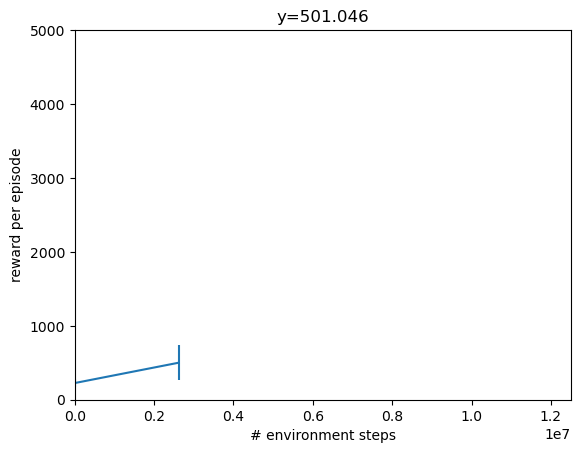

{'eval/walltime': 70.65183973312378, 'training/sps': 49327.80806304676, 'training/walltime': 134.58780217170715, 'training/entropy_loss': Array(-0.006, dtype=float32), 'training/policy_loss': Array(-0.012, dtype=float32), 'training/total_loss': Array(0.157, dtype=float32), 'training/v_loss': Array(0.175, dtype=float32), 'eval/episode_distance_from_origin': Array(733.303, dtype=float32), 'eval/episode_forward_reward': Array(222.737, dtype=float32), 'eval/episode_reward': Array(1129.412, dtype=float32), 'eval/episode_reward_alive': Array(1031.367, dtype=float32), 'eval/episode_reward_linvel': Array(222.737, dtype=float32), 'eval/episode_reward_quadctrl': Array(-124.692, dtype=float32), 'eval/episode_x_position': Array(653.789, dtype=float32), 'eval/episode_x_velocity': Array(178.19, dtype=float32), 'eval/episode_y_position': Array(157.606, dtype=float32), 'eval/episode_y_velocity': Array(42.982, dtype=float32), 'eval/episode_distance_from_origin_std': Array(1313.151, dtype=float32), 'eva

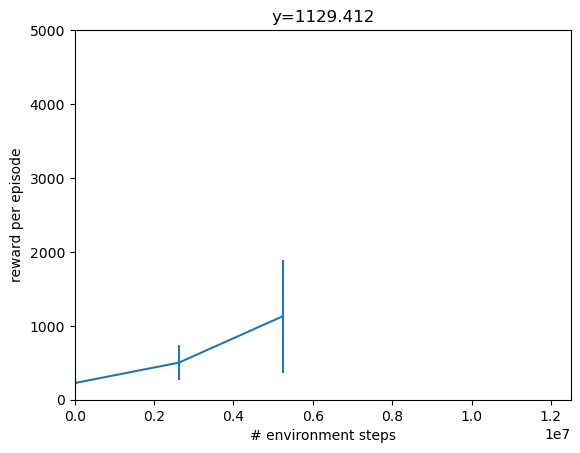

{'eval/walltime': 80.99567770957947, 'training/sps': 49227.62043591302, 'training/walltime': 187.83920812606812, 'training/entropy_loss': Array(-0.005, dtype=float32), 'training/policy_loss': Array(-0.01, dtype=float32), 'training/total_loss': Array(0.122, dtype=float32), 'training/v_loss': Array(0.137, dtype=float32), 'eval/episode_distance_from_origin': Array(3707.828, dtype=float32), 'eval/episode_forward_reward': Array(583.035, dtype=float32), 'eval/episode_reward': Array(2541.104, dtype=float32), 'eval/episode_reward_alive': Array(2218.164, dtype=float32), 'eval/episode_reward_linvel': Array(583.035, dtype=float32), 'eval/episode_reward_quadctrl': Array(-260.094, dtype=float32), 'eval/episode_x_position': Array(3537.638, dtype=float32), 'eval/episode_x_velocity': Array(466.429, dtype=float32), 'eval/episode_y_position': Array(791.359, dtype=float32), 'eval/episode_y_velocity': Array(109.784, dtype=float32), 'eval/episode_distance_from_origin_std': Array(4307.126, dtype=float32), '

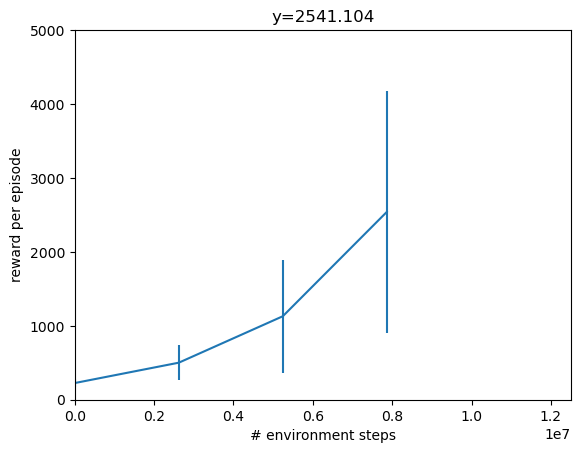

{'eval/walltime': 91.45011973381042, 'training/sps': 49154.64308645692, 'training/walltime': 241.16967368125916, 'training/entropy_loss': Array(-0.004, dtype=float32), 'training/policy_loss': Array(-0.009, dtype=float32), 'training/total_loss': Array(0.098, dtype=float32), 'training/v_loss': Array(0.111, dtype=float32), 'eval/episode_distance_from_origin': Array(4364.317, dtype=float32), 'eval/episode_forward_reward': Array(755.377, dtype=float32), 'eval/episode_reward': Array(2594.32, dtype=float32), 'eval/episode_reward_alive': Array(2085.156, dtype=float32), 'eval/episode_reward_linvel': Array(755.377, dtype=float32), 'eval/episode_reward_quadctrl': Array(-246.213, dtype=float32), 'eval/episode_x_position': Array(4196.094, dtype=float32), 'eval/episode_x_velocity': Array(604.303, dtype=float32), 'eval/episode_y_position': Array(925.065, dtype=float32), 'eval/episode_y_velocity': Array(133.861, dtype=float32), 'eval/episode_distance_from_origin_std': Array(4912.583, dtype=float32), '

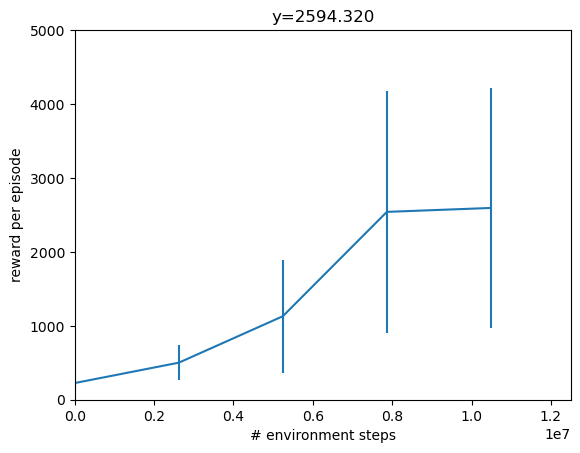

time to jit: 0:01:09.946189
time to train: 0:04:42.981790
3

--------

Iteration3-Robot0

--------



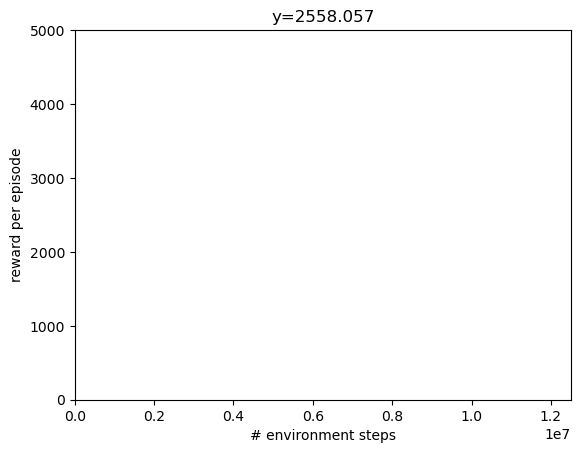

{'eval/walltime': 59.3167839050293, 'training/sps': 32030.495359379434, 'training/walltime': 81.84200620651245, 'training/entropy_loss': Array(-0.003, dtype=float32), 'training/policy_loss': Array(-0.01, dtype=float32), 'training/total_loss': Array(0.07, dtype=float32), 'training/v_loss': Array(0.082, dtype=float32), 'eval/episode_distance_from_origin': Array(7867.315, dtype=float32), 'eval/episode_forward_reward': Array(1022.658, dtype=float32), 'eval/episode_reward': Array(3661.486, dtype=float32), 'eval/episode_reward_alive': Array(2939.219, dtype=float32), 'eval/episode_reward_linvel': Array(1022.658, dtype=float32), 'eval/episode_reward_quadctrl': Array(-300.39, dtype=float32), 'eval/episode_x_position': Array(7769.01, dtype=float32), 'eval/episode_x_velocity': Array(818.128, dtype=float32), 'eval/episode_y_position': Array(392.537, dtype=float32), 'eval/episode_y_velocity': Array(45.598, dtype=float32), 'eval/episode_distance_from_origin_std': Array(7055.819, dtype=float32), 'eva

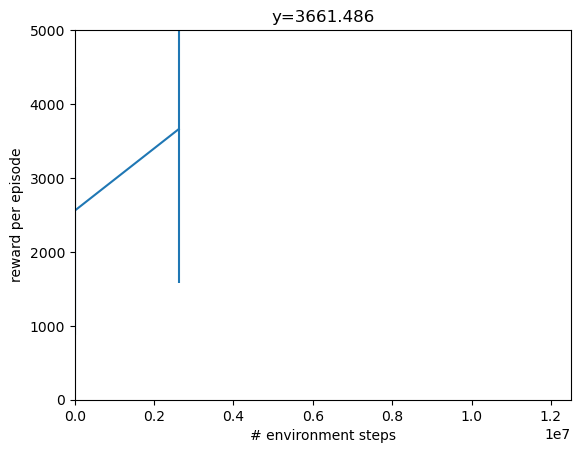

{'eval/walltime': 69.6622576713562, 'training/sps': 49454.95337963009, 'training/walltime': 134.84862780570984, 'training/entropy_loss': Array(-0.001, dtype=float32), 'training/policy_loss': Array(-0.008, dtype=float32), 'training/total_loss': Array(0.085, dtype=float32), 'training/v_loss': Array(0.095, dtype=float32), 'eval/episode_distance_from_origin': Array(9519.552, dtype=float32), 'eval/episode_forward_reward': Array(1206.444, dtype=float32), 'eval/episode_reward': Array(3889.191, dtype=float32), 'eval/episode_reward_alive': Array(2986.094, dtype=float32), 'eval/episode_reward_linvel': Array(1206.444, dtype=float32), 'eval/episode_reward_quadctrl': Array(-303.345, dtype=float32), 'eval/episode_x_position': Array(9404.242, dtype=float32), 'eval/episode_x_velocity': Array(965.158, dtype=float32), 'eval/episode_y_position': Array(732.333, dtype=float32), 'eval/episode_y_velocity': Array(80.232, dtype=float32), 'eval/episode_distance_from_origin_std': Array(8401.591, dtype=float32), 

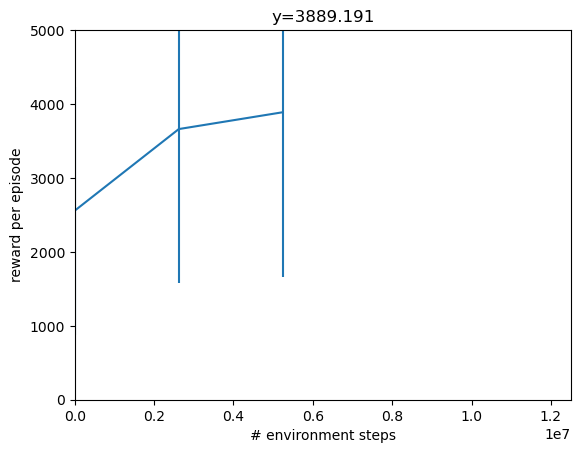

{'eval/walltime': 80.12798571586609, 'training/sps': 49276.10902210604, 'training/walltime': 188.04763340950012, 'training/entropy_loss': Array(-0., dtype=float32), 'training/policy_loss': Array(-0.008, dtype=float32), 'training/total_loss': Array(0.091, dtype=float32), 'training/v_loss': Array(0.099, dtype=float32), 'eval/episode_distance_from_origin': Array(11555.966, dtype=float32), 'eval/episode_forward_reward': Array(1459.89, dtype=float32), 'eval/episode_reward': Array(4266.519, dtype=float32), 'eval/episode_reward_alive': Array(3124.375, dtype=float32), 'eval/episode_reward_linvel': Array(1459.89, dtype=float32), 'eval/episode_reward_quadctrl': Array(-317.744, dtype=float32), 'eval/episode_x_position': Array(11446.597, dtype=float32), 'eval/episode_x_velocity': Array(1167.915, dtype=float32), 'eval/episode_y_position': Array(820.402, dtype=float32), 'eval/episode_y_velocity': Array(79.588, dtype=float32), 'eval/episode_distance_from_origin_std': Array(9510.857, dtype=float32), '

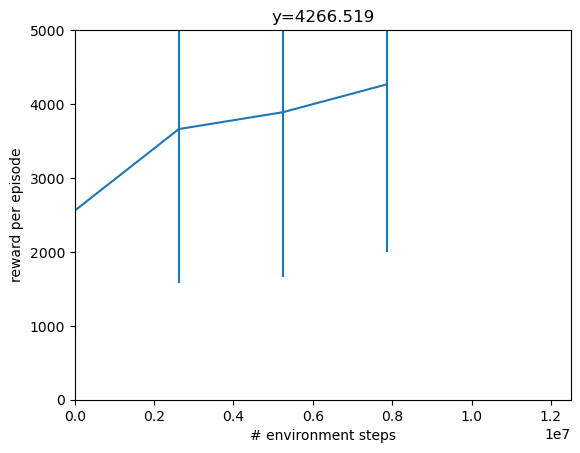

{'eval/walltime': 90.49899458885193, 'training/sps': 49155.31904734968, 'training/walltime': 241.37736558914185, 'training/entropy_loss': Array(0.001, dtype=float32), 'training/policy_loss': Array(-0.007, dtype=float32), 'training/total_loss': Array(0.1, dtype=float32), 'training/v_loss': Array(0.106, dtype=float32), 'eval/episode_distance_from_origin': Array(12520.096, dtype=float32), 'eval/episode_forward_reward': Array(1599.234, dtype=float32), 'eval/episode_reward': Array(4384.063, dtype=float32), 'eval/episode_reward_alive': Array(3097.695, dtype=float32), 'eval/episode_reward_linvel': Array(1599.234, dtype=float32), 'eval/episode_reward_quadctrl': Array(-312.866, dtype=float32), 'eval/episode_x_position': Array(12437.319, dtype=float32), 'eval/episode_x_velocity': Array(1279.391, dtype=float32), 'eval/episode_y_position': Array(273.822, dtype=float32), 'eval/episode_y_velocity': Array(28.499, dtype=float32), 'eval/episode_distance_from_origin_std': Array(10395.34, dtype=float32),

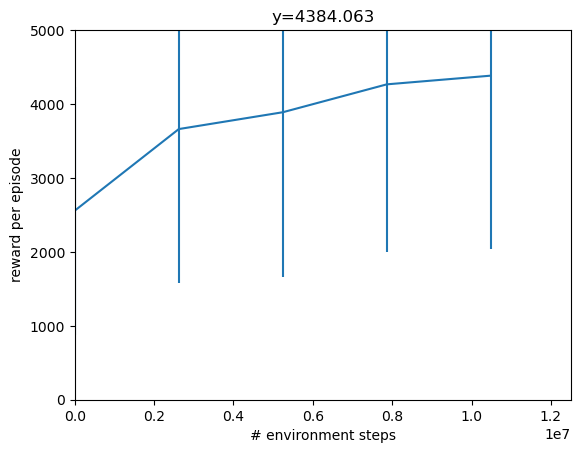

time to jit: 0:01:09.081773
time to train: 0:04:43.330531

--------

Iteration3-Robot1

--------



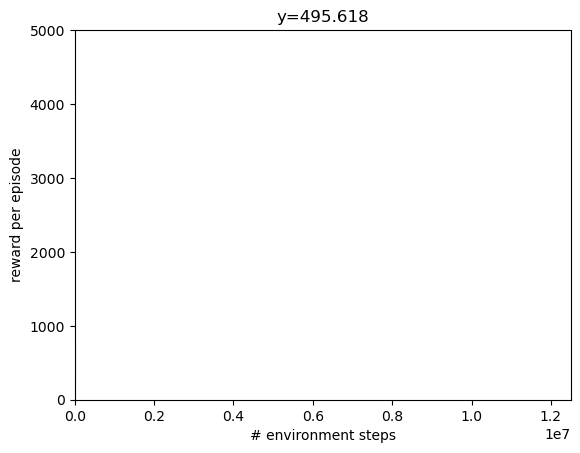

{'eval/walltime': 59.48674416542053, 'training/sps': 32310.30149735579, 'training/walltime': 81.13325715065002, 'training/entropy_loss': Array(-0.003, dtype=float32), 'training/policy_loss': Array(-0.01, dtype=float32), 'training/total_loss': Array(0.197, dtype=float32), 'training/v_loss': Array(0.211, dtype=float32), 'eval/episode_distance_from_origin': Array(814.373, dtype=float32), 'eval/episode_forward_reward': Array(279.968, dtype=float32), 'eval/episode_reward': Array(1188.598, dtype=float32), 'eval/episode_reward_alive': Array(1032.227, dtype=float32), 'eval/episode_reward_linvel': Array(279.968, dtype=float32), 'eval/episode_reward_quadctrl': Array(-123.596, dtype=float32), 'eval/episode_x_position': Array(724.797, dtype=float32), 'eval/episode_x_velocity': Array(223.975, dtype=float32), 'eval/episode_y_position': Array(192.092, dtype=float32), 'eval/episode_y_velocity': Array(74.667, dtype=float32), 'eval/episode_distance_from_origin_std': Array(1008.905, dtype=float32), 'eval

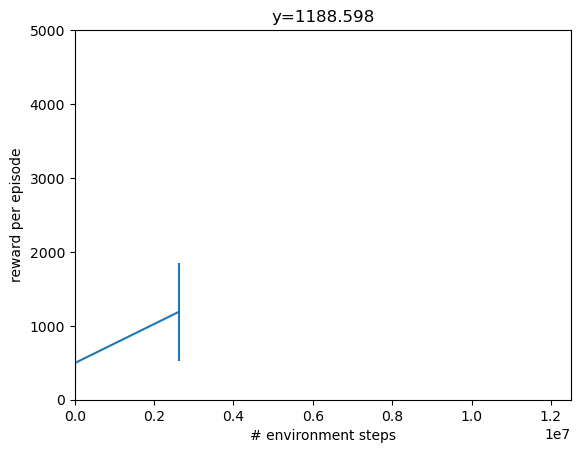

time to jit: 0:01:07.203629
time to train: 0:01:31.531064

--------

Iteration3-Robot2

--------



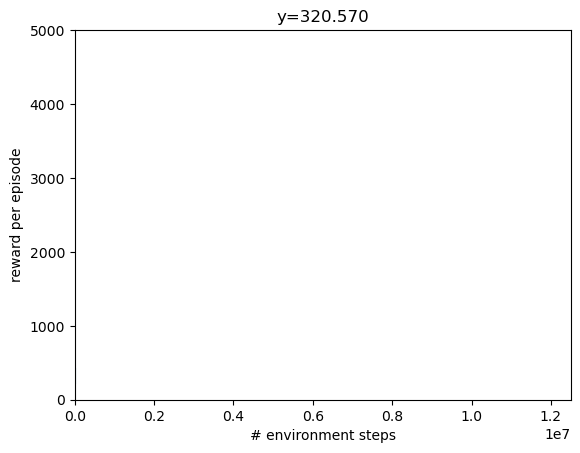

{'eval/walltime': 60.330363750457764, 'training/sps': 32004.237490179432, 'training/walltime': 81.9091534614563, 'training/entropy_loss': Array(-0.002, dtype=float32), 'training/policy_loss': Array(-0.008, dtype=float32), 'training/total_loss': Array(0.16, dtype=float32), 'training/v_loss': Array(0.17, dtype=float32), 'eval/episode_distance_from_origin': Array(121.895, dtype=float32), 'eval/episode_forward_reward': Array(99.982, dtype=float32), 'eval/episode_reward': Array(502.816, dtype=float32), 'eval/episode_reward_alive': Array(445.117, dtype=float32), 'eval/episode_reward_linvel': Array(99.982, dtype=float32), 'eval/episode_reward_quadctrl': Array(-42.284, dtype=float32), 'eval/episode_x_position': Array(76.996, dtype=float32), 'eval/episode_x_velocity': Array(79.986, dtype=float32), 'eval/episode_y_position': Array(0.981, dtype=float32), 'eval/episode_y_velocity': Array(10.822, dtype=float32), 'eval/episode_distance_from_origin_std': Array(62.063, dtype=float32), 'eval/episode_fo

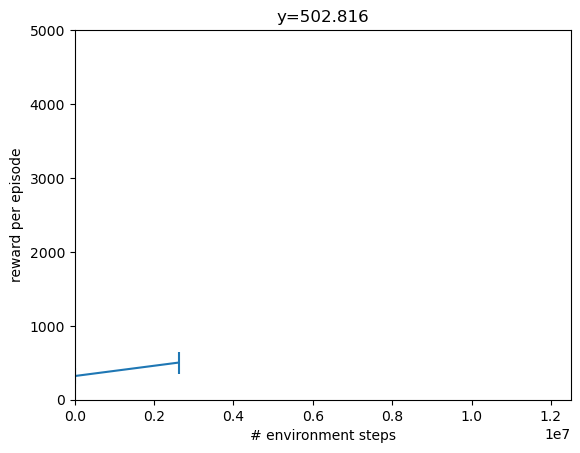

time to jit: 0:01:10.347308
time to train: 0:01:32.273862

--------

Iteration3-Robot3

--------



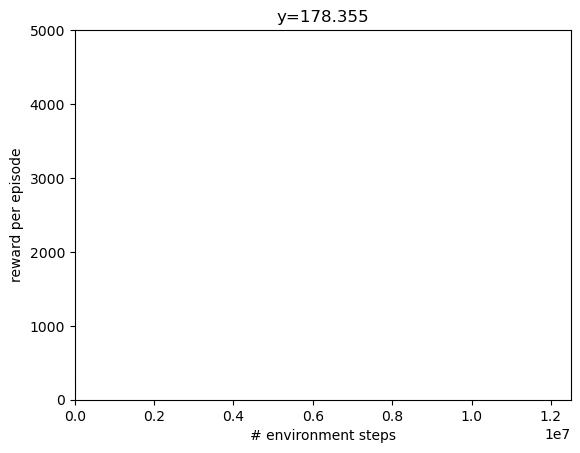

{'eval/walltime': 60.806374073028564, 'training/sps': 32036.92485848315, 'training/walltime': 81.82558131217957, 'training/entropy_loss': Array(-0.005, dtype=float32), 'training/policy_loss': Array(-0.011, dtype=float32), 'training/total_loss': Array(0.161, dtype=float32), 'training/v_loss': Array(0.177, dtype=float32), 'eval/episode_distance_from_origin': Array(91.171, dtype=float32), 'eval/episode_forward_reward': Array(56.354, dtype=float32), 'eval/episode_reward': Array(360.166, dtype=float32), 'eval/episode_reward_alive': Array(346.875, dtype=float32), 'eval/episode_reward_linvel': Array(56.354, dtype=float32), 'eval/episode_reward_quadctrl': Array(-43.063, dtype=float32), 'eval/episode_x_position': Array(41.049, dtype=float32), 'eval/episode_x_velocity': Array(45.083, dtype=float32), 'eval/episode_y_position': Array(31.705, dtype=float32), 'eval/episode_y_velocity': Array(32.494, dtype=float32), 'eval/episode_distance_from_origin_std': Array(62.866, dtype=float32), 'eval/episode_

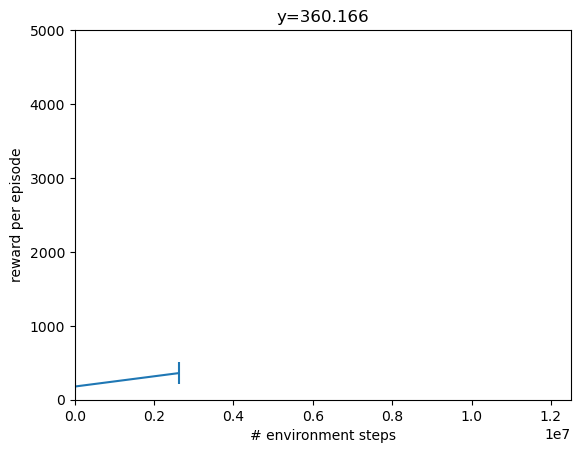

time to jit: 0:01:08.903739
time to train: 0:01:32.197239
4

--------

Iteration4-Robot0

--------



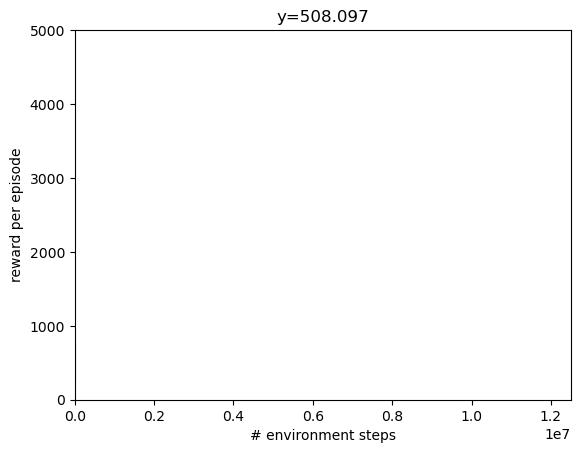

{'eval/walltime': 59.16057062149048, 'training/sps': 32038.784444880373, 'training/walltime': 81.82083201408386, 'training/entropy_loss': Array(0., dtype=float32), 'training/policy_loss': Array(-0.01, dtype=float32), 'training/total_loss': Array(0.286, dtype=float32), 'training/v_loss': Array(0.296, dtype=float32), 'eval/episode_distance_from_origin': Array(1831.562, dtype=float32), 'eval/episode_forward_reward': Array(458.258, dtype=float32), 'eval/episode_reward': Array(1604.542, dtype=float32), 'eval/episode_reward_alive': Array(1293.32, dtype=float32), 'eval/episode_reward_linvel': Array(458.258, dtype=float32), 'eval/episode_reward_quadctrl': Array(-147.036, dtype=float32), 'eval/episode_x_position': Array(1566.807, dtype=float32), 'eval/episode_x_velocity': Array(366.607, dtype=float32), 'eval/episode_y_position': Array(796.609, dtype=float32), 'eval/episode_y_velocity': Array(225.168, dtype=float32), 'eval/episode_distance_from_origin_std': Array(2723.582, dtype=float32), 'eval/

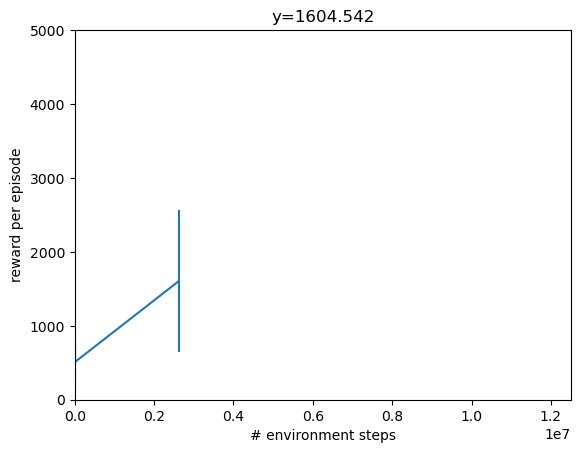

{'eval/walltime': 69.47958540916443, 'training/sps': 49407.94995552006, 'training/walltime': 134.8778805732727, 'training/entropy_loss': Array(0.001, dtype=float32), 'training/policy_loss': Array(-0.008, dtype=float32), 'training/total_loss': Array(0.215, dtype=float32), 'training/v_loss': Array(0.221, dtype=float32), 'eval/episode_distance_from_origin': Array(4931.883, dtype=float32), 'eval/episode_forward_reward': Array(852.646, dtype=float32), 'eval/episode_reward': Array(2571.483, dtype=float32), 'eval/episode_reward_alive': Array(1937.656, dtype=float32), 'eval/episode_reward_linvel': Array(852.646, dtype=float32), 'eval/episode_reward_quadctrl': Array(-218.819, dtype=float32), 'eval/episode_x_position': Array(4488.736, dtype=float32), 'eval/episode_x_velocity': Array(682.118, dtype=float32), 'eval/episode_y_position': Array(1816.725, dtype=float32), 'eval/episode_y_velocity': Array(308.025, dtype=float32), 'eval/episode_distance_from_origin_std': Array(6384.277, dtype=float32), '

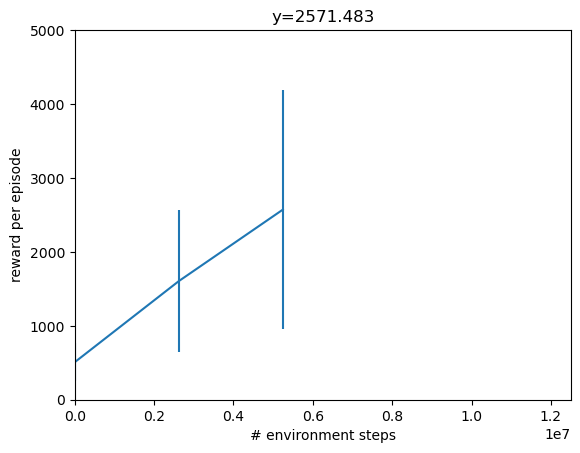

{'eval/walltime': 79.85294961929321, 'training/sps': 49270.27363838042, 'training/walltime': 188.0831868648529, 'training/entropy_loss': Array(0.003, dtype=float32), 'training/policy_loss': Array(-0.007, dtype=float32), 'training/total_loss': Array(0.164, dtype=float32), 'training/v_loss': Array(0.168, dtype=float32), 'eval/episode_distance_from_origin': Array(14125.26, dtype=float32), 'eval/episode_forward_reward': Array(1718.788, dtype=float32), 'eval/episode_reward': Array(4599.221, dtype=float32), 'eval/episode_reward_alive': Array(3237.734, dtype=float32), 'eval/episode_reward_linvel': Array(1718.788, dtype=float32), 'eval/episode_reward_quadctrl': Array(-357.301, dtype=float32), 'eval/episode_x_position': Array(13623.738, dtype=float32), 'eval/episode_x_velocity': Array(1375.034, dtype=float32), 'eval/episode_y_position': Array(3323.76, dtype=float32), 'eval/episode_y_velocity': Array(363.734, dtype=float32), 'eval/episode_distance_from_origin_std': Array(11061.886, dtype=float32

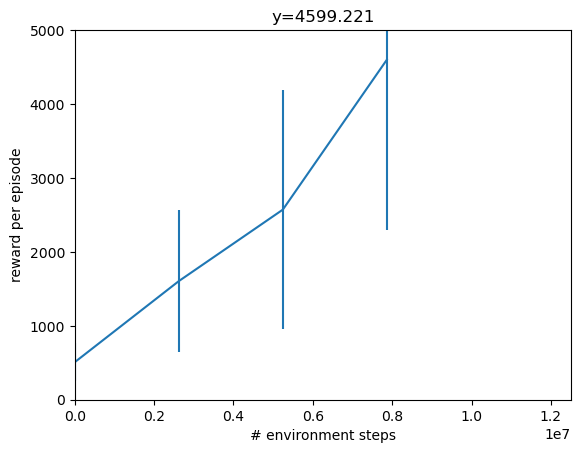

{'eval/walltime': 90.22633409500122, 'training/sps': 49149.94176099701, 'training/walltime': 241.4187536239624, 'training/entropy_loss': Array(0.003, dtype=float32), 'training/policy_loss': Array(-0.006, dtype=float32), 'training/total_loss': Array(0.133, dtype=float32), 'training/v_loss': Array(0.135, dtype=float32), 'eval/episode_distance_from_origin': Array(15368.146, dtype=float32), 'eval/episode_forward_reward': Array(1884.925, dtype=float32), 'eval/episode_reward': Array(4770.648, dtype=float32), 'eval/episode_reward_alive': Array(3247.5, dtype=float32), 'eval/episode_reward_linvel': Array(1884.925, dtype=float32), 'eval/episode_reward_quadctrl': Array(-361.775, dtype=float32), 'eval/episode_x_position': Array(14771.24, dtype=float32), 'eval/episode_x_velocity': Array(1507.944, dtype=float32), 'eval/episode_y_position': Array(3811.99, dtype=float32), 'eval/episode_y_velocity': Array(423.5, dtype=float32), 'eval/episode_distance_from_origin_std': Array(11760.035, dtype=float32), '

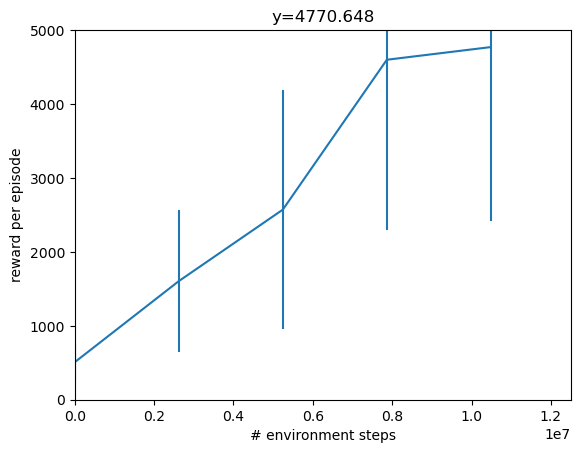

time to jit: 0:01:05.939131
time to train: 0:04:43.106629

--------

Iteration4-Robot1

--------



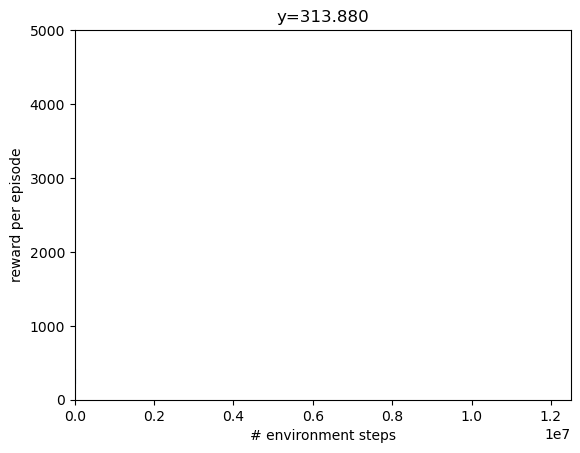

{'eval/walltime': 60.00034236907959, 'training/sps': 31861.919781407578, 'training/walltime': 82.27501726150513, 'training/entropy_loss': Array(0.001, dtype=float32), 'training/policy_loss': Array(-0.01, dtype=float32), 'training/total_loss': Array(0.305, dtype=float32), 'training/v_loss': Array(0.314, dtype=float32), 'eval/episode_distance_from_origin': Array(2623.167, dtype=float32), 'eval/episode_forward_reward': Array(566.171, dtype=float32), 'eval/episode_reward': Array(2028.739, dtype=float32), 'eval/episode_reward_alive': Array(1618.984, dtype=float32), 'eval/episode_reward_linvel': Array(566.171, dtype=float32), 'eval/episode_reward_quadctrl': Array(-156.416, dtype=float32), 'eval/episode_x_position': Array(2429.135, dtype=float32), 'eval/episode_x_velocity': Array(452.937, dtype=float32), 'eval/episode_y_position': Array(-722.478, dtype=float32), 'eval/episode_y_velocity': Array(-157.545, dtype=float32), 'eval/episode_distance_from_origin_std': Array(3244.786, dtype=float32), 

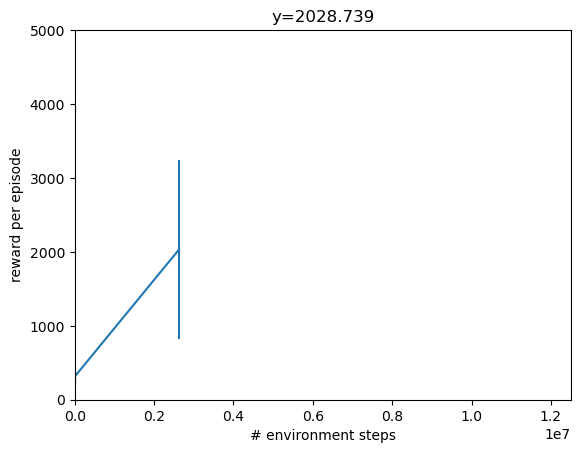

{'eval/walltime': 70.30711436271667, 'training/sps': 49313.41042580139, 'training/walltime': 135.43378233909607, 'training/entropy_loss': Array(0.002, dtype=float32), 'training/policy_loss': Array(-0.008, dtype=float32), 'training/total_loss': Array(0.12, dtype=float32), 'training/v_loss': Array(0.126, dtype=float32), 'eval/episode_distance_from_origin': Array(12475.326, dtype=float32), 'eval/episode_forward_reward': Array(1548.48, dtype=float32), 'eval/episode_reward': Array(4470.254, dtype=float32), 'eval/episode_reward_alive': Array(3238.633, dtype=float32), 'eval/episode_reward_linvel': Array(1548.48, dtype=float32), 'eval/episode_reward_quadctrl': Array(-316.858, dtype=float32), 'eval/episode_x_position': Array(12318.111, dtype=float32), 'eval/episode_x_velocity': Array(1238.788, dtype=float32), 'eval/episode_y_position': Array(-1153.833, dtype=float32), 'eval/episode_y_velocity': Array(-106.701, dtype=float32), 'eval/episode_distance_from_origin_std': Array(9737.508, dtype=float3

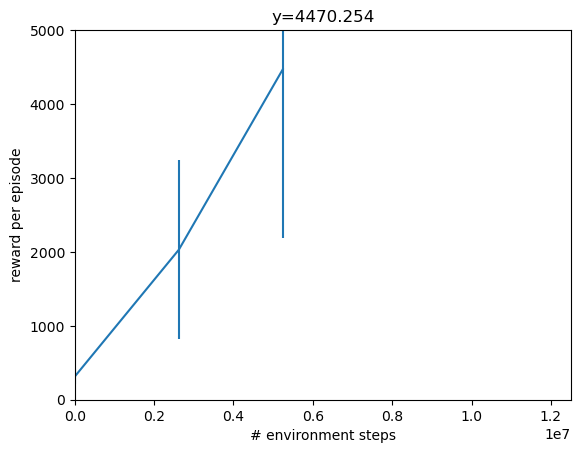

{'eval/walltime': 80.61558628082275, 'training/sps': 49231.93410414488, 'training/walltime': 188.680522441864, 'training/entropy_loss': Array(0.003, dtype=float32), 'training/policy_loss': Array(-0.007, dtype=float32), 'training/total_loss': Array(0.091, dtype=float32), 'training/v_loss': Array(0.095, dtype=float32), 'eval/episode_distance_from_origin': Array(16599.645, dtype=float32), 'eval/episode_forward_reward': Array(1981.651, dtype=float32), 'eval/episode_reward': Array(5226.938, dtype=float32), 'eval/episode_reward_alive': Array(3597.109, dtype=float32), 'eval/episode_reward_linvel': Array(1981.651, dtype=float32), 'eval/episode_reward_quadctrl': Array(-351.82, dtype=float32), 'eval/episode_x_position': Array(16446.29, dtype=float32), 'eval/episode_x_velocity': Array(1585.325, dtype=float32), 'eval/episode_y_position': Array(-1319.305, dtype=float32), 'eval/episode_y_velocity': Array(-130.142, dtype=float32), 'eval/episode_distance_from_origin_std': Array(10946.586, dtype=float3

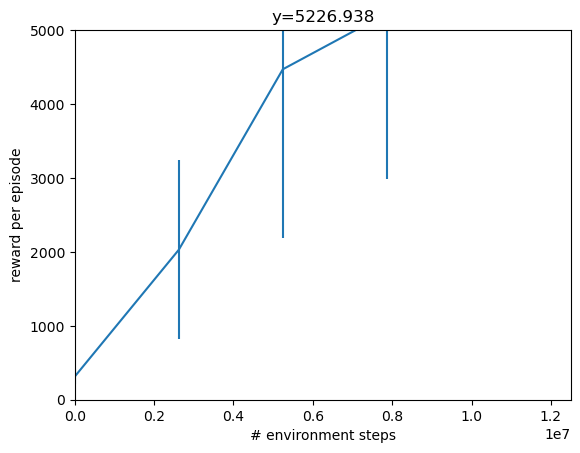

{'eval/walltime': 90.89902377128601, 'training/sps': 49136.73338098287, 'training/walltime': 242.0304262638092, 'training/entropy_loss': Array(0.004, dtype=float32), 'training/policy_loss': Array(-0.005, dtype=float32), 'training/total_loss': Array(0.094, dtype=float32), 'training/v_loss': Array(0.095, dtype=float32), 'eval/episode_distance_from_origin': Array(23143.852, dtype=float32), 'eval/episode_forward_reward': Array(2557.261, dtype=float32), 'eval/episode_reward': Array(6307.733, dtype=float32), 'eval/episode_reward_alive': Array(4160.977, dtype=float32), 'eval/episode_reward_linvel': Array(2557.261, dtype=float32), 'eval/episode_reward_quadctrl': Array(-410.503, dtype=float32), 'eval/episode_x_position': Array(22971.902, dtype=float32), 'eval/episode_x_velocity': Array(2045.815, dtype=float32), 'eval/episode_y_position': Array(-1879.536, dtype=float32), 'eval/episode_y_velocity': Array(-164.254, dtype=float32), 'eval/episode_distance_from_origin_std': Array(11016.32, dtype=floa

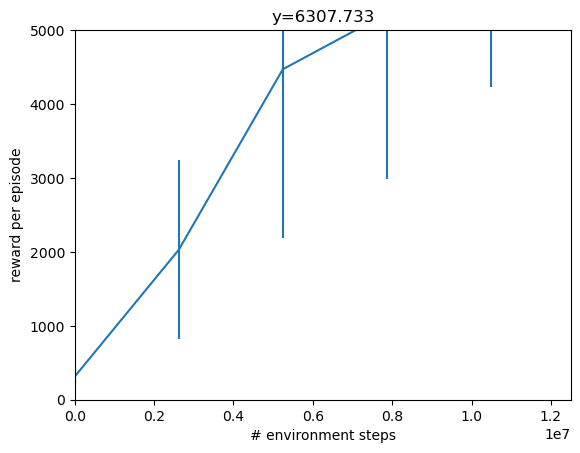

time to jit: 0:01:08.119070
time to train: 0:04:43.578301

--------

Iteration4-Robot2

--------



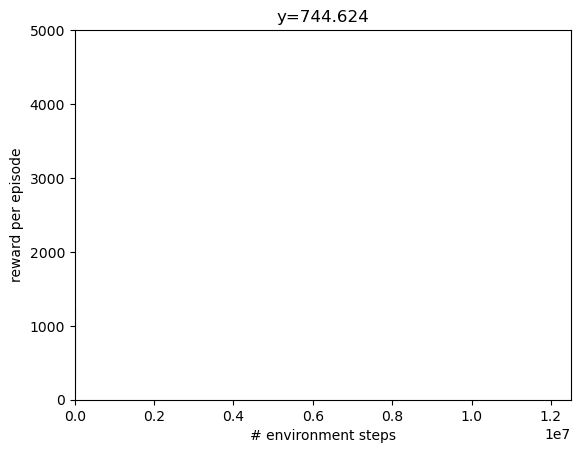

{'eval/walltime': 60.614962577819824, 'training/sps': 31957.59352047417, 'training/walltime': 82.02870464324951, 'training/entropy_loss': Array(-0., dtype=float32), 'training/policy_loss': Array(-0.009, dtype=float32), 'training/total_loss': Array(0.269, dtype=float32), 'training/v_loss': Array(0.279, dtype=float32), 'eval/episode_distance_from_origin': Array(2989.48, dtype=float32), 'eval/episode_forward_reward': Array(616.475, dtype=float32), 'eval/episode_reward': Array(2084.244, dtype=float32), 'eval/episode_reward_alive': Array(1653.086, dtype=float32), 'eval/episode_reward_linvel': Array(616.475, dtype=float32), 'eval/episode_reward_quadctrl': Array(-185.316, dtype=float32), 'eval/episode_x_position': Array(2902.11, dtype=float32), 'eval/episode_x_velocity': Array(493.18, dtype=float32), 'eval/episode_y_position': Array(208.259, dtype=float32), 'eval/episode_y_velocity': Array(54.107, dtype=float32), 'eval/episode_distance_from_origin_std': Array(4106.935, dtype=float32), 'eval/e

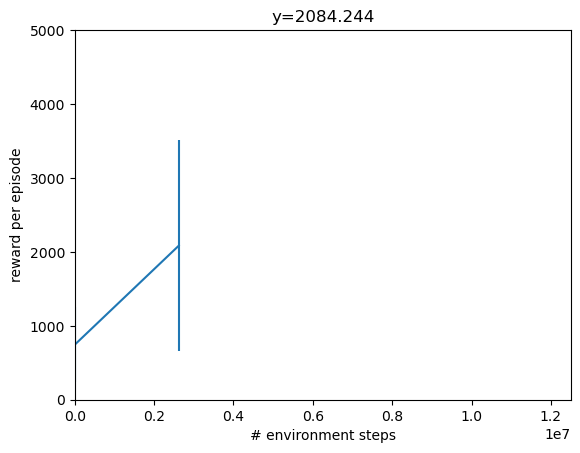

{'eval/walltime': 70.91852140426636, 'training/sps': 49417.27792583204, 'training/walltime': 135.07573819160461, 'training/entropy_loss': Array(0.001, dtype=float32), 'training/policy_loss': Array(-0.008, dtype=float32), 'training/total_loss': Array(0.195, dtype=float32), 'training/v_loss': Array(0.201, dtype=float32), 'eval/episode_distance_from_origin': Array(6862.401, dtype=float32), 'eval/episode_forward_reward': Array(1054.47, dtype=float32), 'eval/episode_reward': Array(3085.358, dtype=float32), 'eval/episode_reward_alive': Array(2289.922, dtype=float32), 'eval/episode_reward_linvel': Array(1054.47, dtype=float32), 'eval/episode_reward_quadctrl': Array(-259.034, dtype=float32), 'eval/episode_x_position': Array(6761.136, dtype=float32), 'eval/episode_x_velocity': Array(843.578, dtype=float32), 'eval/episode_y_position': Array(445.328, dtype=float32), 'eval/episode_y_velocity': Array(58.296, dtype=float32), 'eval/episode_distance_from_origin_std': Array(8162.049, dtype=float32), 'e

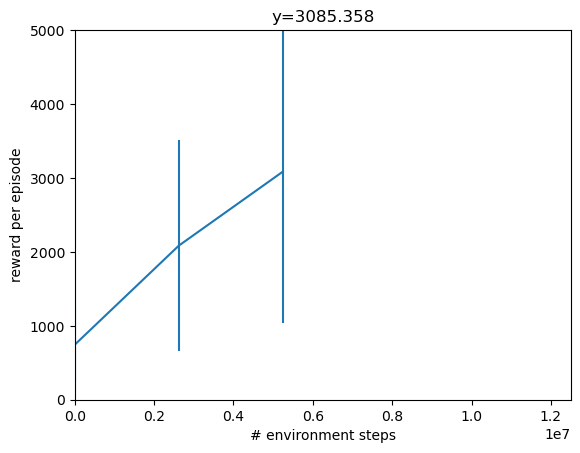

{'eval/walltime': 81.21550965309143, 'training/sps': 49206.58313015227, 'training/walltime': 188.34991073608398, 'training/entropy_loss': Array(0.002, dtype=float32), 'training/policy_loss': Array(-0.007, dtype=float32), 'training/total_loss': Array(0.154, dtype=float32), 'training/v_loss': Array(0.159, dtype=float32), 'eval/episode_distance_from_origin': Array(10314.666, dtype=float32), 'eval/episode_forward_reward': Array(1424.287, dtype=float32), 'eval/episode_reward': Array(3840.885, dtype=float32), 'eval/episode_reward_alive': Array(2722.461, dtype=float32), 'eval/episode_reward_linvel': Array(1424.287, dtype=float32), 'eval/episode_reward_quadctrl': Array(-305.863, dtype=float32), 'eval/episode_x_position': Array(10226.021, dtype=float32), 'eval/episode_x_velocity': Array(1139.433, dtype=float32), 'eval/episode_y_position': Array(340.324, dtype=float32), 'eval/episode_y_velocity': Array(46.424, dtype=float32), 'eval/episode_distance_from_origin_std': Array(10123.135, dtype=float3

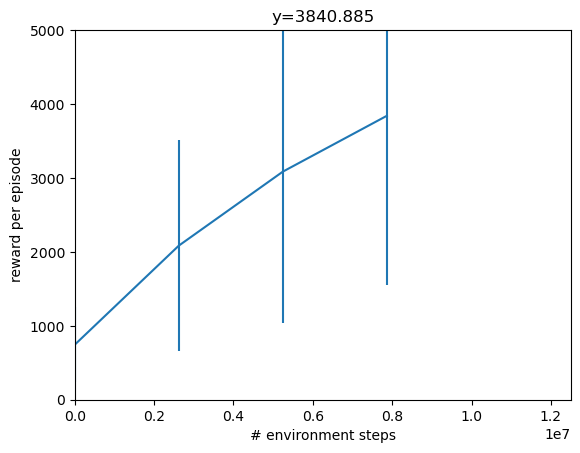

time to jit: 0:01:08.564440
time to train: 0:03:39.501843

--------

Iteration4-Robot3

--------



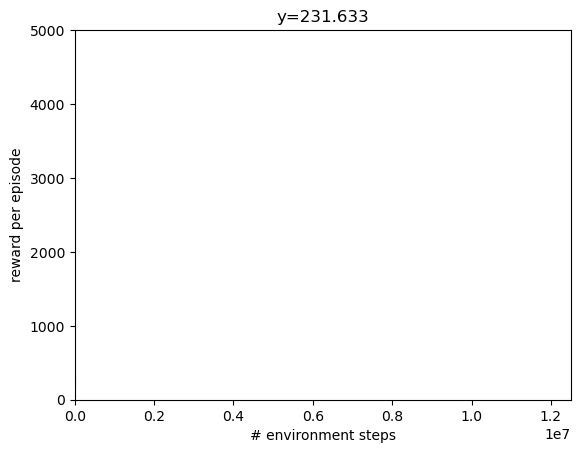

{'eval/walltime': 61.18703484535217, 'training/sps': 32846.68320974836, 'training/walltime': 79.80836248397827, 'training/entropy_loss': Array(-0.002, dtype=float32), 'training/policy_loss': Array(-0.012, dtype=float32), 'training/total_loss': Array(0.248, dtype=float32), 'training/v_loss': Array(0.262, dtype=float32), 'eval/episode_distance_from_origin': Array(128.868, dtype=float32), 'eval/episode_forward_reward': Array(89.77, dtype=float32), 'eval/episode_reward': Array(468.575, dtype=float32), 'eval/episode_reward_alive': Array(430.195, dtype=float32), 'eval/episode_reward_linvel': Array(89.77, dtype=float32), 'eval/episode_reward_quadctrl': Array(-51.39, dtype=float32), 'eval/episode_x_position': Array(78.191, dtype=float32), 'eval/episode_x_velocity': Array(71.816, dtype=float32), 'eval/episode_y_position': Array(38.9, dtype=float32), 'eval/episode_y_velocity': Array(38.529, dtype=float32), 'eval/episode_distance_from_origin_std': Array(86.757, dtype=float32), 'eval/episode_forwa

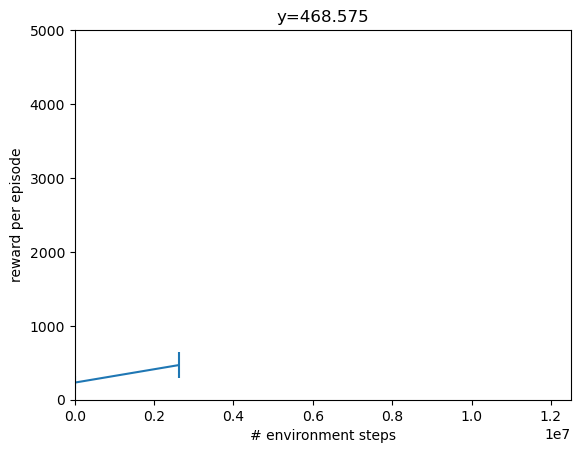

time to jit: 0:01:09.208246
time to train: 0:01:30.158009
5

--------

Iteration5-Robot0

--------



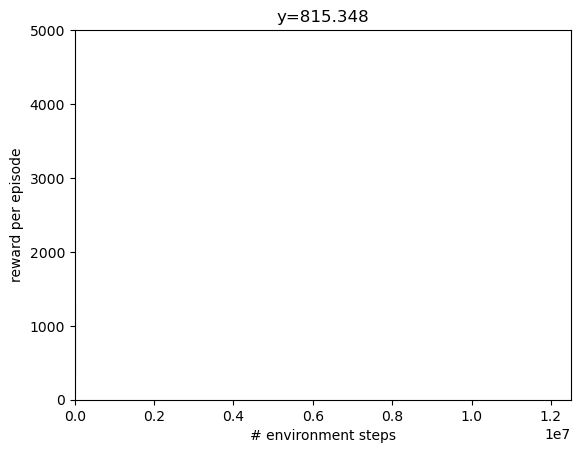

{'eval/walltime': 59.89862132072449, 'training/sps': 33116.44687842116, 'training/walltime': 79.15825057029724, 'training/entropy_loss': Array(0.005, dtype=float32), 'training/policy_loss': Array(-0.004, dtype=float32), 'training/total_loss': Array(0.404, dtype=float32), 'training/v_loss': Array(0.403, dtype=float32), 'eval/episode_distance_from_origin': Array(2907.097, dtype=float32), 'eval/episode_forward_reward': Array(710.425, dtype=float32), 'eval/episode_reward': Array(1995.078, dtype=float32), 'eval/episode_reward_alive': Array(1432.734, dtype=float32), 'eval/episode_reward_linvel': Array(710.425, dtype=float32), 'eval/episode_reward_quadctrl': Array(-148.081, dtype=float32), 'eval/episode_x_position': Array(2847.922, dtype=float32), 'eval/episode_x_velocity': Array(568.34, dtype=float32), 'eval/episode_y_position': Array(13.075, dtype=float32), 'eval/episode_y_velocity': Array(5.21, dtype=float32), 'eval/episode_distance_from_origin_std': Array(4338.437, dtype=float32), 'eval/e

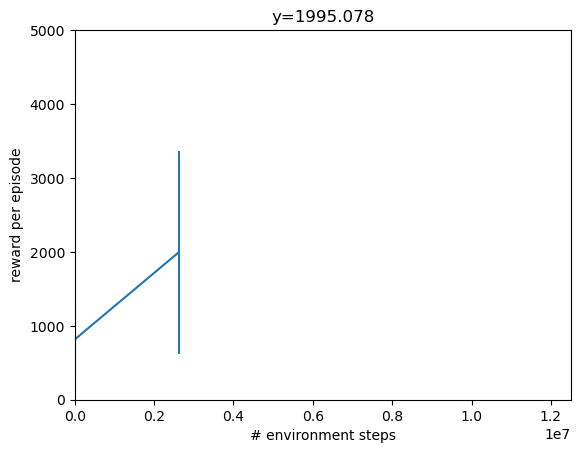

{'eval/walltime': 70.19199013710022, 'training/sps': 49509.74624850563, 'training/walltime': 132.1062092781067, 'training/entropy_loss': Array(0.006, dtype=float32), 'training/policy_loss': Array(-0.004, dtype=float32), 'training/total_loss': Array(0.273, dtype=float32), 'training/v_loss': Array(0.271, dtype=float32), 'eval/episode_distance_from_origin': Array(10758.813, dtype=float32), 'eval/episode_forward_reward': Array(1518.016, dtype=float32), 'eval/episode_reward': Array(3921.808, dtype=float32), 'eval/episode_reward_alive': Array(2672.773, dtype=float32), 'eval/episode_reward_linvel': Array(1518.016, dtype=float32), 'eval/episode_reward_quadctrl': Array(-268.981, dtype=float32), 'eval/episode_x_position': Array(10671.188, dtype=float32), 'eval/episode_x_velocity': Array(1214.416, dtype=float32), 'eval/episode_y_position': Array(-35.052, dtype=float32), 'eval/episode_y_velocity': Array(28.655, dtype=float32), 'eval/episode_distance_from_origin_std': Array(10537.506, dtype=float32

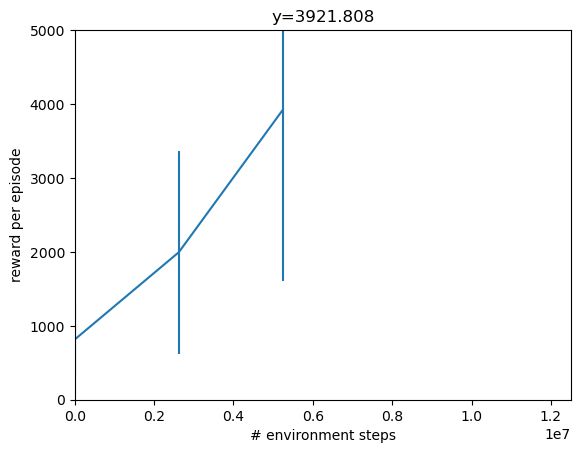

{'eval/walltime': 80.49322152137756, 'training/sps': 49355.887910036145, 'training/walltime': 185.21922397613525, 'training/entropy_loss': Array(0.007, dtype=float32), 'training/policy_loss': Array(-0.003, dtype=float32), 'training/total_loss': Array(0.168, dtype=float32), 'training/v_loss': Array(0.165, dtype=float32), 'eval/episode_distance_from_origin': Array(19897.836, dtype=float32), 'eval/episode_forward_reward': Array(2338.255, dtype=float32), 'eval/episode_reward': Array(5585.725, dtype=float32), 'eval/episode_reward_alive': Array(3609.375, dtype=float32), 'eval/episode_reward_linvel': Array(2338.255, dtype=float32), 'eval/episode_reward_quadctrl': Array(-361.904, dtype=float32), 'eval/episode_x_position': Array(19811.695, dtype=float32), 'eval/episode_x_velocity': Array(1870.609, dtype=float32), 'eval/episode_y_position': Array(297.111, dtype=float32), 'eval/episode_y_velocity': Array(46.386, dtype=float32), 'eval/episode_distance_from_origin_std': Array(13077.615, dtype=float

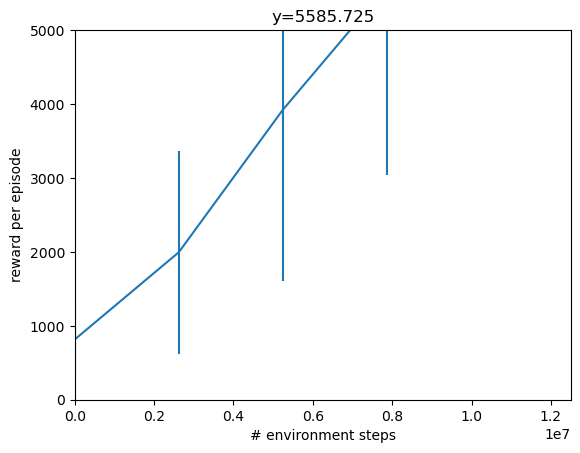

{'eval/walltime': 90.8286874294281, 'training/sps': 49236.55124994765, 'training/walltime': 238.46097087860107, 'training/entropy_loss': Array(0.007, dtype=float32), 'training/policy_loss': Array(-0.003, dtype=float32), 'training/total_loss': Array(0.115, dtype=float32), 'training/v_loss': Array(0.111, dtype=float32), 'eval/episode_distance_from_origin': Array(24675.484, dtype=float32), 'eval/episode_forward_reward': Array(2785.565, dtype=float32), 'eval/episode_reward': Array(6324.293, dtype=float32), 'eval/episode_reward_alive': Array(3930.078, dtype=float32), 'eval/episode_reward_linvel': Array(2785.565, dtype=float32), 'eval/episode_reward_quadctrl': Array(-391.348, dtype=float32), 'eval/episode_x_position': Array(24590.77, dtype=float32), 'eval/episode_x_velocity': Array(2228.459, dtype=float32), 'eval/episode_y_position': Array(-586.318, dtype=float32), 'eval/episode_y_velocity': Array(-24.911, dtype=float32), 'eval/episode_distance_from_origin_std': Array(13712.557, dtype=float3

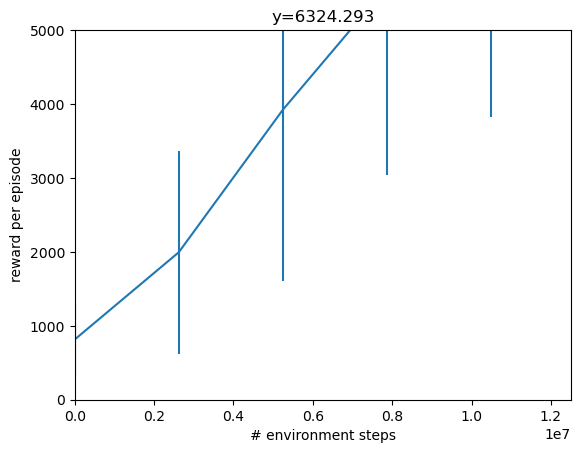

time to jit: 0:01:06.534311
time to train: 0:04:40.072359

--------

Iteration5-Robot1

--------



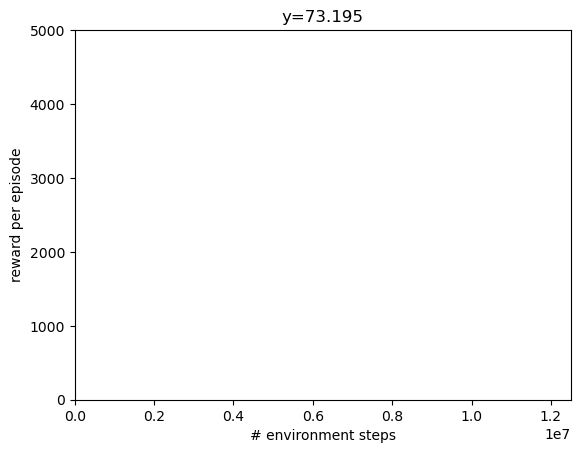

{'eval/walltime': 57.602412939071655, 'training/sps': 31633.827344896887, 'training/walltime': 82.86825275421143, 'training/entropy_loss': Array(0.001, dtype=float32), 'training/policy_loss': Array(-0.014, dtype=float32), 'training/total_loss': Array(0.738, dtype=float32), 'training/v_loss': Array(0.751, dtype=float32), 'eval/episode_distance_from_origin': Array(72.858, dtype=float32), 'eval/episode_forward_reward': Array(56.278, dtype=float32), 'eval/episode_reward': Array(311.027, dtype=float32), 'eval/episode_reward_alive': Array(291.641, dtype=float32), 'eval/episode_reward_linvel': Array(56.278, dtype=float32), 'eval/episode_reward_quadctrl': Array(-36.892, dtype=float32), 'eval/episode_x_position': Array(38.668, dtype=float32), 'eval/episode_x_velocity': Array(45.022, dtype=float32), 'eval/episode_y_position': Array(14.301, dtype=float32), 'eval/episode_y_velocity': Array(23.482, dtype=float32), 'eval/episode_distance_from_origin_std': Array(57.969, dtype=float32), 'eval/episode_

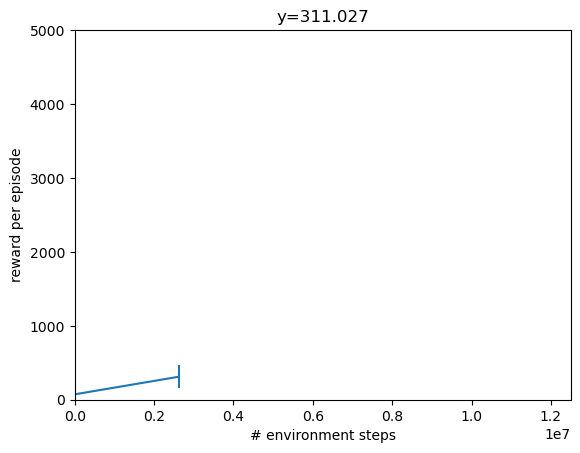

time to jit: 0:01:08.052635
time to train: 0:01:33.290706

--------

Iteration5-Robot2

--------



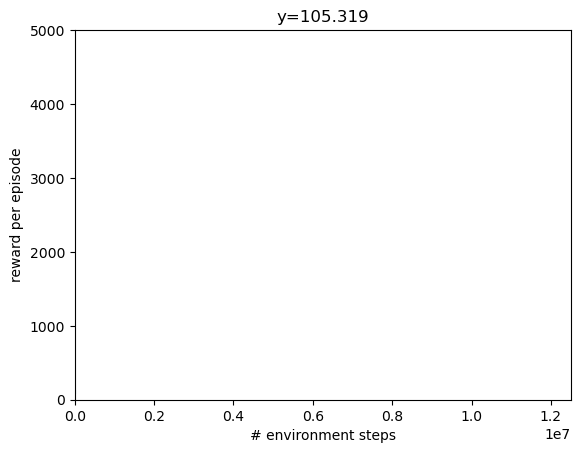

{'eval/walltime': 61.240472078323364, 'training/sps': 31526.295424316424, 'training/walltime': 83.1509051322937, 'training/entropy_loss': Array(-0.002, dtype=float32), 'training/policy_loss': Array(0.016, dtype=float32), 'training/total_loss': Array(0.149, dtype=float32), 'training/v_loss': Array(0.136, dtype=float32), 'eval/episode_distance_from_origin': Array(28.892, dtype=float32), 'eval/episode_forward_reward': Array(15.918, dtype=float32), 'eval/episode_reward': Array(160.137, dtype=float32), 'eval/episode_reward_alive': Array(163.867, dtype=float32), 'eval/episode_reward_linvel': Array(15.918, dtype=float32), 'eval/episode_reward_quadctrl': Array(-19.648, dtype=float32), 'eval/episode_x_position': Array(4.05, dtype=float32), 'eval/episode_x_velocity': Array(12.735, dtype=float32), 'eval/episode_y_position': Array(-0.825, dtype=float32), 'eval/episode_y_velocity': Array(-3.189, dtype=float32), 'eval/episode_distance_from_origin_std': Array(5.749, dtype=float32), 'eval/episode_forw

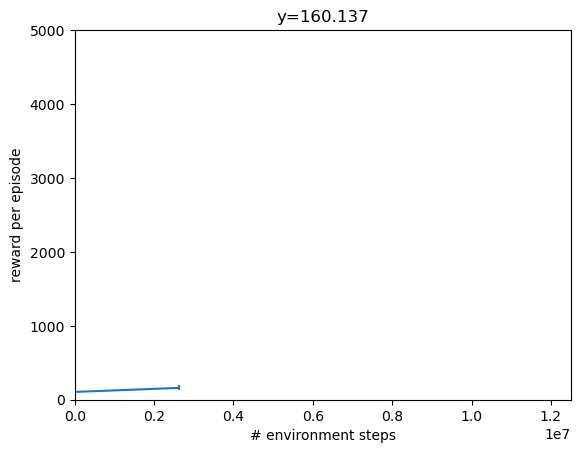

time to jit: 0:01:08.844566
time to train: 0:01:33.573586

--------

Iteration5-Robot3

--------



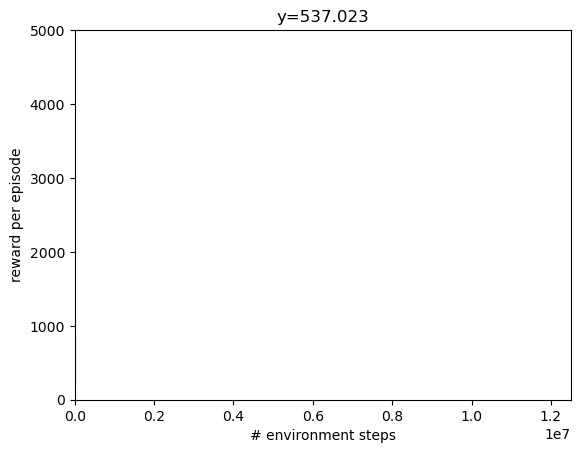

{'eval/walltime': 61.75952649116516, 'training/sps': 32874.38873085646, 'training/walltime': 79.74110245704651, 'training/entropy_loss': Array(0.005, dtype=float32), 'training/policy_loss': Array(-0.007, dtype=float32), 'training/total_loss': Array(0.298, dtype=float32), 'training/v_loss': Array(0.301, dtype=float32), 'eval/episode_distance_from_origin': Array(1312.2, dtype=float32), 'eval/episode_forward_reward': Array(523.253, dtype=float32), 'eval/episode_reward': Array(1510.823, dtype=float32), 'eval/episode_reward_alive': Array(1089.492, dtype=float32), 'eval/episode_reward_linvel': Array(523.253, dtype=float32), 'eval/episode_reward_quadctrl': Array(-101.922, dtype=float32), 'eval/episode_x_position': Array(1250.961, dtype=float32), 'eval/episode_x_velocity': Array(418.602, dtype=float32), 'eval/episode_y_position': Array(-136.455, dtype=float32), 'eval/episode_y_velocity': Array(-48.445, dtype=float32), 'eval/episode_distance_from_origin_std': Array(1606.447, dtype=float32), 'ev

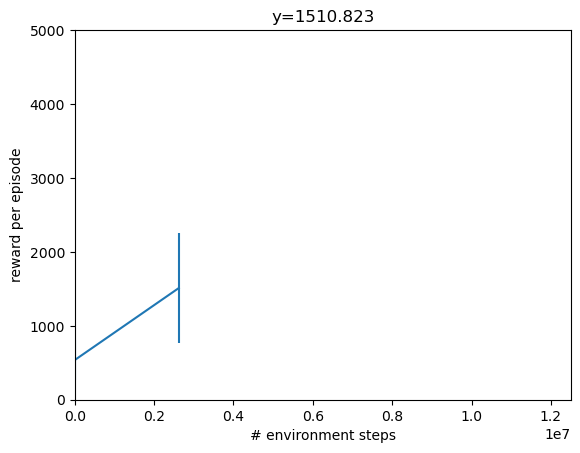

{'eval/walltime': 72.0647325515747, 'training/sps': 49424.50493795029, 'training/walltime': 132.78037929534912, 'training/entropy_loss': Array(0.005, dtype=float32), 'training/policy_loss': Array(-0.006, dtype=float32), 'training/total_loss': Array(0.238, dtype=float32), 'training/v_loss': Array(0.239, dtype=float32), 'eval/episode_distance_from_origin': Array(8858.426, dtype=float32), 'eval/episode_forward_reward': Array(1418.646, dtype=float32), 'eval/episode_reward': Array(3554.324, dtype=float32), 'eval/episode_reward_alive': Array(2358.789, dtype=float32), 'eval/episode_reward_linvel': Array(1418.646, dtype=float32), 'eval/episode_reward_quadctrl': Array(-223.111, dtype=float32), 'eval/episode_x_position': Array(8771.484, dtype=float32), 'eval/episode_x_velocity': Array(1134.919, dtype=float32), 'eval/episode_y_position': Array(-645.052, dtype=float32), 'eval/episode_y_velocity': Array(-78.906, dtype=float32), 'eval/episode_distance_from_origin_std': Array(10177.926, dtype=float32

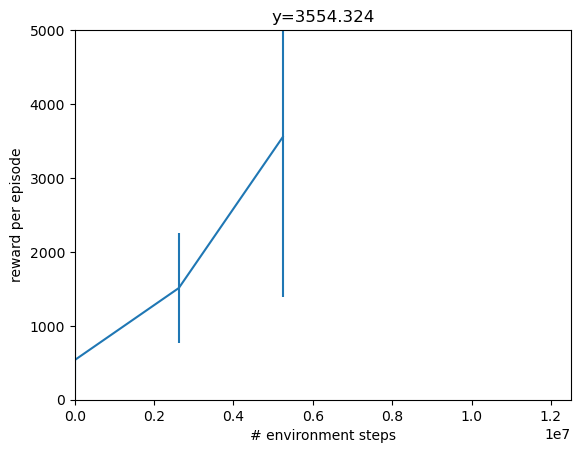

{'eval/walltime': 82.40071845054626, 'training/sps': 49371.77506654735, 'training/walltime': 185.8763029575348, 'training/entropy_loss': Array(0.006, dtype=float32), 'training/policy_loss': Array(-0.005, dtype=float32), 'training/total_loss': Array(0.139, dtype=float32), 'training/v_loss': Array(0.137, dtype=float32), 'eval/episode_distance_from_origin': Array(23186.031, dtype=float32), 'eval/episode_forward_reward': Array(2658.286, dtype=float32), 'eval/episode_reward': Array(6206.089, dtype=float32), 'eval/episode_reward_alive': Array(3921.562, dtype=float32), 'eval/episode_reward_linvel': Array(2658.286, dtype=float32), 'eval/episode_reward_quadctrl': Array(-373.758, dtype=float32), 'eval/episode_x_position': Array(23037.066, dtype=float32), 'eval/episode_x_velocity': Array(2126.635, dtype=float32), 'eval/episode_y_position': Array(-1629.181, dtype=float32), 'eval/episode_y_velocity': Array(-150.493, dtype=float32), 'eval/episode_distance_from_origin_std': Array(12786.501, dtype=flo

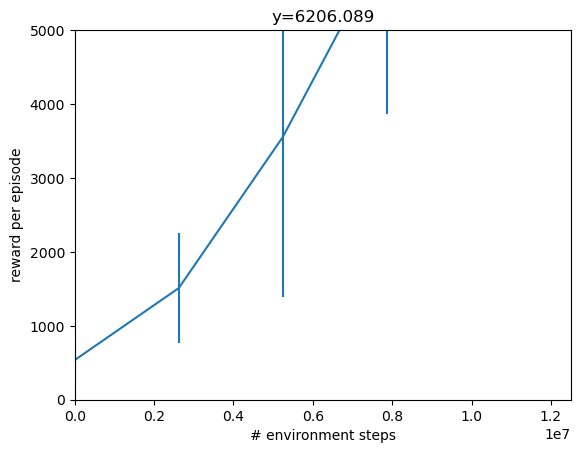

{'eval/walltime': 92.75815343856812, 'training/sps': 49270.00891824782, 'training/walltime': 239.08189511299133, 'training/entropy_loss': Array(0.007, dtype=float32), 'training/policy_loss': Array(-0.003, dtype=float32), 'training/total_loss': Array(0.103, dtype=float32), 'training/v_loss': Array(0.099, dtype=float32), 'eval/episode_distance_from_origin': Array(24977.613, dtype=float32), 'eval/episode_forward_reward': Array(2903.227, dtype=float32), 'eval/episode_reward': Array(6400.93, dtype=float32), 'eval/episode_reward_alive': Array(3874.805, dtype=float32), 'eval/episode_reward_linvel': Array(2903.227, dtype=float32), 'eval/episode_reward_quadctrl': Array(-377.1, dtype=float32), 'eval/episode_x_position': Array(24768.512, dtype=float32), 'eval/episode_x_velocity': Array(2322.588, dtype=float32), 'eval/episode_y_position': Array(-2562.646, dtype=float32), 'eval/episode_y_velocity': Array(-258.469, dtype=float32), 'eval/episode_distance_from_origin_std': Array(14262.777, dtype=float

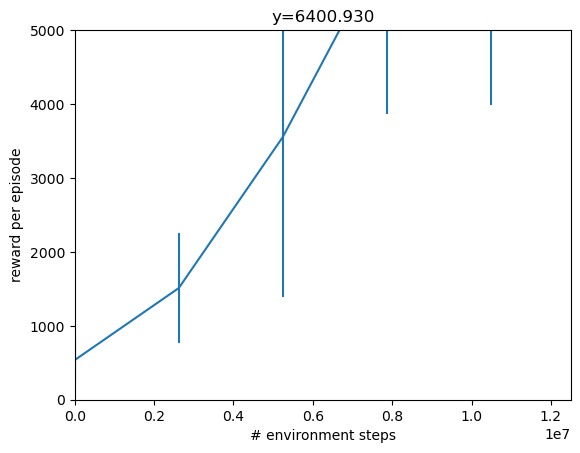

time to jit: 0:01:09.797249
time to train: 0:04:40.760475


In [ ]:
#@title Genetic Algorithm (Early Elimination  & Discretization)
#name = "init"
#path = humanoid_genesis([0 for i in range(num_scaling_var)], name)
path = "/home/name/Desktop/Codes/Data/Xml_files/init.xml"
init_robot = Robot(np.array([ 0 for i in range(num_scaling_var)]),
                   path,
                   None
                   )
continue_from = 0
Candidates = [init_robot for i in range(N)]
FitnessScores = [0 for i in range(N)]
FitnessScores = np.array(FitnessScores)
Params = [0 for i in range(N)]
selected = init_robot
Envs = [0 for i in range(N)]
for i in range(continue_from, num_iterations_to_go):
  cmprsn_rewards = None
  print(i)
  #Sampling
  for j in range(2): # ADJUST THE HEALTHY Z RANGE, OBTAINED FROM GENESIS
      sc_var_change = np.subtract(np.random.randint(4,size=num_scaling_var), np.array([2 for i in range(num_scaling_var)]))
      new_scv = np.add(selected.scaling_var,sc_var_change*0.1)
      name=f"Humanoid_Gen{i}_Robot{j}"
      Candidates[j] = Robot(new_scv, humanoid_genesis(new_scv, name), selected.brain)
  for j in range(2):
      sc_var_change = np.subtract(np.random.randint(4,size=num_scaling_var), np.array([2 for i in range(num_scaling_var)]))
      new_scv = np.add(selected.scaling_var,sc_var_change*0.1)
      name=f"Humanoid_Gen{i}_Robot{j+2}"
      Candidates[j+2] = Robot(new_scv, humanoid_genesis(new_scv, name), selected.brain)

  #Fitness scores(perhaps can be taken from y_datas)
  for k in range(N-1):
    name=f"Humanoid_Gen{i}_Robot{k}"
    rob_env = envs.get_environment (createIt(Candidates[k].model_path, name))
    Envs[k] = rob_env
    
    x_data = []
    y_data = []
    ydataerr = []
    times = [datetime.now()]
    print(f"\n--------\n\nIteration{i}-Robot{k}\n\n--------\n")
    a,b,c,d= train_fn(environment=rob_env, progress_fn=progress, transfer_params=Candidates[k].brain, cmprsn_rewards=cmprsn_rewards)
    #make_inference_fn, Params[k], _,rob_new_training_state = train_fn(environment=rob_env, progress_fn=progress)
    if a == None:
        continue
    make_inference_fn, Params[k], _,rob_new_training_state = a,b,c,d
    print(f'time to jit: {times[1] - times[0]}')
    print(f'time to train: {times[-1] - times[1]}')
    FitnessScores[k] = y_data[-1]
    new_rob = Robot(Candidates[k].scaling_var, Candidates[k].model_path, rob_new_training_state)
    Candidates[k] = new_rob
    if cmprsn_rewards == None: 
      cmprsn_rewards = y_data
    elif cmprsn_rewards[-1]<y_data[-1] :
      cmprsn_rewards = y_data
    
        
  #Selection and Recording
  index = np.argmax(FitnessScores)
  selected = Candidates[index]
  selected_params = Params[index]
  name = f"policy-Gen{i}"
  model_path = f'/home/name/Desktop/Codes/ScalingOptimization (1)/policies/{name}'
  model.save_params(model_path, selected_params)
  f = open("/home/name/Desktop/Codes/ScalingOptimization (1)/logofselecteds.txt", "a")
  f.write(f"{i}. Generation Model:{model_path}\n{i}. Generation Scaling Variables: {selected.scaling_var}\n")
  f.close()

  inference_fn = make_inference_fn(selected_params)
  jit_inference_fn = jax.jit(inference_fn)
  eval_env = Envs[index]
  jit_reset = jax.jit(eval_env.reset)
  jit_step = jax.jit(eval_env.step)
  # initialize the state
  renderer = None
  renderer = mujoco.Renderer(eval_env.model, width = 1920, height = 1080 )
  def get_image(state: State, camera: str) -> np.ndarray:
    """Renders the environment state."""
    d = mujoco.MjData(eval_env.model)
    # write the mjx.Data into an mjData object
    mjx.device_get_into(d, state.pipeline_state)
    mujoco.mj_forward(eval_env.model, d)
    # use the mjData object to update the renderer
    renderer.update_scene(d, camera=camera)
    return renderer.render()
  rng = jax.random.PRNGKey(0)
  state = jit_reset(rng)
  rollout = [state]
  images = [get_image(state, camera='side')]

  n_steps = 5000
  render_every = 2

  for k in range(n_steps):
    act_rng, rng = jax.random.split(rng)
    ctrl, _ = jit_inference_fn(state.obs, act_rng)
    state = jit_step(state, ctrl)
    rollout.append(state)
    if k % render_every == 0:
      images.append(get_image(state, camera='side'))

    if state.done:
      break

  media.write_video(path = f"/home/name/Desktop/Videos/Running_Genetic/Gen{i}Runner_Selected.mp4", images = images, fps=1.0 / eval_env.dt / render_every)
  Candidates[4] = selected
  FitnessScores[4] = FitnessScores[index]
  Params[4] = selected_params
  Envs[4] = eval_env